In [17]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


## Imports

In [18]:
import os
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import string
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, precision_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [20]:
## paths where datasets are located
enron1_train_ham_path = "//content//drive//MyDrive//project1_datasets//enron1_train//train//ham"
enron1_train_spam_path = "//content//drive//MyDrive//project1_datasets//enron1_train//train//spam"
enron1_test_ham_path = "//content//drive//MyDrive//project1_datasets//enron1_test//test//ham"
enron1_test_spam_path = "//content//drive//MyDrive//project1_datasets//enron1_test//test//spam"

enron2_train_ham_path = "//content//drive//MyDrive//project1_datasets//enron2_train//train//ham"
enron2_train_spam_path = "//content//drive//MyDrive//project1_datasets//enron2_train//train//spam"
enron2_test_ham_path = "//content//drive//MyDrive//project1_datasets//enron2_test//test//ham"
enron2_test_spam_path = "//content//drive//MyDrive//project1_datasets//enron2_test//test//spam"

enron4_train_ham_path = "//content//drive//MyDrive//project1_datasets//enron4_train//train//ham"
enron4_train_spam_path = "//content//drive//MyDrive//project1_datasets//enron4_train//train//spam"
enron4_test_ham_path = "//content//drive//MyDrive//project1_datasets//enron4_test//test//ham"
enron4_test_spam_path = "//content//drive//MyDrive//project1_datasets//enron4_test//test//spam"


## Creating the dataset

In [21]:
all_data = []

def create_dataset(path):
    for dirpath, dirnames, filenames in os.walk(path):
        for filename in filenames:
            with open(path+"//"+filename, "rb") as f:
                all_data.append([f.read(), path.split("//")[-1]])

paths = [enron1_train_ham_path, enron1_train_spam_path, enron1_test_ham_path, enron1_test_spam_path, enron2_train_ham_path, enron2_train_spam_path, enron2_test_ham_path, enron2_test_spam_path, enron4_train_ham_path, enron4_train_spam_path, enron4_test_ham_path, enron4_test_spam_path]

for path in paths:
    create_dataset(path)

len(all_data)

2925

In [22]:
# creating each enron dataset
def create_individual_dataset(path, dataset):
    for dirpath, dirnames, filenames in os.walk(path):
        for filename in filenames:
            with open(path+"//"+filename, "rb") as f:
                dataset.append([f.read(), path.split("//")[-1]])
    return dataset

"""For training"""
enron1_train_ham_df = []
enron1_train_ham_df = create_individual_dataset(enron1_train_ham_path, enron1_train_ham_df)
enron1_train_spam_df = []
enron1_train_spam_df = create_individual_dataset(enron1_train_spam_path, enron1_train_spam_df)

print(len(enron1_train_ham_df), len(enron1_train_spam_df))

enron2_train_ham_df = []
enron2_train_ham_df = create_individual_dataset(enron2_train_ham_path, enron2_train_ham_df)
enron2_train_spam_df = []
enron2_train_spam_df = create_individual_dataset(enron2_train_spam_path, enron2_train_spam_df)

print(len(enron2_train_ham_df), len(enron2_train_spam_df))

enron4_train_ham_df = []
enron4_train_ham_df = create_individual_dataset(enron4_train_ham_path, enron4_train_ham_df)
enron4_train_spam_df = []
enron4_train_spam_df = create_individual_dataset(enron4_train_spam_path, enron4_train_spam_df)

print(len(enron4_train_ham_df), len(enron4_train_spam_df))

"""For testing"""
enron1_test_ham_df = []
enron1_test_ham_df = create_individual_dataset(enron1_test_ham_path, enron1_test_ham_df)
enron1_test_spam_df = []
enron1_test_spam_df = create_individual_dataset(enron1_test_spam_path, enron1_test_spam_df)

print(len(enron1_test_ham_df), len(enron1_test_spam_df))

enron2_test_ham_df = []
enron2_test_ham_df = create_individual_dataset(enron2_test_ham_path, enron2_test_ham_df)
enron2_test_spam_df = []
enron2_test_spam_df = create_individual_dataset(enron2_test_spam_path, enron2_test_spam_df)

print(len(enron2_test_ham_df), len(enron2_test_spam_df))

enron4_test_ham_df = []
enron4_test_ham_df = create_individual_dataset(enron4_test_ham_path, enron4_test_ham_df)
enron4_test_spam_df = []
enron4_test_spam_df = create_individual_dataset(enron4_test_spam_path, enron4_test_spam_df)

print(len(enron4_test_ham_df), len(enron4_test_spam_df))

319 131
340 123
133 402
307 149
348 130
152 391


In [23]:
"""Converting string to byte string"""

def convert_to_str(data):
    converted_data = []
    for item in data:
        if isinstance(item[0], bytes):
            # If the item is in bytes, decode it to a string
            converted_data.append([item[0].decode('utf-8', errors='ignore'), item[1]])
        else:
            # If the item is already a string, just append it
                 converted_data.append([item[0], item[1]])
    return converted_data


all_data = convert_to_str(all_data)

In [24]:
enron1_train_ham_df = convert_to_str(enron1_train_ham_df)
enron1_train_spam_df = convert_to_str(enron1_train_spam_df)
enron2_train_ham_df = convert_to_str(enron2_train_ham_df)
enron2_train_spam_df = convert_to_str(enron2_train_spam_df)
enron4_train_ham_df = convert_to_str(enron4_train_ham_df)
enron4_train_spam_df = convert_to_str(enron4_train_spam_df)

enron1_test_ham_df = convert_to_str(enron1_test_ham_df)
enron1_test_spam_df = convert_to_str(enron1_test_spam_df)
enron2_test_ham_df = convert_to_str(enron2_test_ham_df)
enron2_test_spam_df = convert_to_str(enron2_test_spam_df)
enron4_test_ham_df = convert_to_str(enron4_test_ham_df)
enron4_test_spam_df = convert_to_str(enron4_test_spam_df)

In [25]:
enron1_train_spam_df.extend(enron1_train_ham_df)
enron1_train = enron1_train_spam_df
print(len(enron1_train))

enron2_train_spam_df.extend(enron2_train_ham_df)
enron2_train = enron2_train_spam_df
print(len(enron2_train))

enron4_train_spam_df.extend(enron4_train_ham_df)
enron4_train = enron4_train_spam_df
print(len(enron4_train))

enron1_test_spam_df.extend(enron1_test_ham_df)
enron1_test = enron1_test_spam_df
print(len(enron1_test))

enron2_test_spam_df.extend(enron2_test_ham_df)
enron2_test = enron2_test_spam_df
print(len(enron2_test))

enron4_test_spam_df.extend(enron4_test_ham_df)
enron4_test = enron4_test_spam_df
print(len(enron4_test))

450
463
535
456
478
543


## Convert list to Pandas Dataframe

In [26]:
def convert_to_df(data):
    df = pd.DataFrame(data, columns=['Email', 'Type'])
    print(df.shape)
    df = df.sample(frac=1).reset_index(drop=True)
    return df

all_data_df = convert_to_df(all_data)

enron1_train_df = convert_to_df(enron1_train)
enron2_train_df = convert_to_df(enron2_train)
enron4_train_df = convert_to_df(enron4_train)

enron1_test_df = convert_to_df(enron1_test)
enron2_test_df = convert_to_df(enron2_test)
enron4_test_df = convert_to_df(enron4_test)

(2925, 2)
(450, 2)
(463, 2)
(535, 2)
(456, 2)
(478, 2)
(543, 2)


In [27]:
copy_of_enron1_train_df = convert_to_df(enron1_train)
copy_of_enron2_train_df = convert_to_df(enron2_train)
copy_of_enron4_train_df = convert_to_df(enron4_train)

copy_of_enron1_test_df = convert_to_df(enron1_test)
copy_of_enron2_test_df = convert_to_df(enron2_test)
copy_of_enron4_test_df = convert_to_df(enron4_test)

(450, 2)
(463, 2)
(535, 2)
(456, 2)
(478, 2)
(543, 2)


## Preprocessing the data

For preprocessing the data, I have performed the following operations -

- Converting text to lower case

- Rmoving punctuations

- Creating word tokens

- Removing stop words

- Lemmatization

- Removing non alphabetic character

**For this project I have used the Natural Language Toolkit (NLTK) library**

In [28]:
def preprocess(text):
    # conver to lowercase
    text = text.lower()

    # remove punctuations
    text = text.translate(str.maketrans('','', string.punctuation))

    # tokenization
    tokens = word_tokenize(text)

    # stop word removal
    stop_words = set(stopwords.words("english"))
    filtered = [word for word in tokens if word.lower() not in stop_words]

    # lemmatization
    lemma = WordNetLemmatizer()
    filtered = [lemma.lemmatize(word) for word in tokens]

    # remove non-alphabetic characters
    filtered = [word for word in filtered if word.isalpha()]

    return tokens

## Applying the function to Email column
all_data_df['Email_tok'] = all_data_df['Email'].apply(preprocess)

enron1_train_df['Email_tok'] = enron1_train_df['Email'].apply(preprocess)
enron2_train_df['Email_tok'] = enron2_train_df['Email'].apply(preprocess)
enron4_train_df['Email_tok'] = enron4_train_df['Email'].apply(preprocess)

enron1_test_df['Email_tok'] = enron1_test_df['Email'].apply(preprocess)
enron2_test_df['Email_tok'] = enron2_test_df['Email'].apply(preprocess)
enron4_test_df['Email_tok'] = enron4_test_df['Email'].apply(preprocess)


In [29]:
all_data_df['Email_str'] = all_data_df['Email_tok'].apply(lambda x: ' '.join(x))

enron1_train_df['Email_str'] = enron1_train_df['Email_tok'].apply(lambda x: ' '.join(x))
enron2_train_df['Email_str'] = enron2_train_df['Email_tok'].apply(lambda x: ' '.join(x))
enron4_train_df['Email_str'] = enron4_train_df['Email_tok'].apply(lambda x: ' '.join(x))

enron1_test_df['Email_str'] = enron1_test_df['Email_tok'].apply(lambda x: ' '.join(x))
enron2_test_df['Email_str'] = enron2_test_df['Email_tok'].apply(lambda x: ' '.join(x))
enron4_test_df['Email_str'] = enron4_test_df['Email_tok'].apply(lambda x: ' '.join(x))

In [30]:
enron1_train_df

,Email,Type,Email_tok,Email_str
0,"Subject: enron actuals for july 14 thru 16 , 2...",ham,"[subject, enron, actuals, for, july, 14, thru,...",subject enron actuals for july 14 thru 16 2000...
1,Subject: fw : pymt for 03 / 01 sales adjustmen...,ham,"[subject, fw, pymt, for, 03, 01, sales, adjust...",subject fw pymt for 03 01 sales adjustment for...
2,Subject: re : automate load of scheduled quant...,ham,"[subject, re, automate, load, of, scheduled, q...",subject re automate load of scheduled quantity...
3,"Subject: i congratulate you , my friend , with...",spam,"[subject, i, congratulate, you, my, friend, wi...",subject i congratulate you my friend with sain...
4,Subject: re : hi suzette\r\nthe secret on how ...,spam,"[subject, re, hi, suzette, the, secret, on, ho...",subject re hi suzette the secret on how porn s...
...,...,...,...,...
445,"Subject: proccess credit cards online , hispan...",spam,"[subject, proccess, credit, cards, online, his...",subject proccess credit cards online hispanic ...
446,Subject: re : volume increase - hpl meter 68 -...,ham,"[subject, re, volume, increase, hpl, meter, 68...",subject re volume increase hpl meter 68 6296 s...
447,Subject: viewsonic airpanel vl 50 15 - inch sm...,spam,"[subject, viewsonic, airpanel, vl, 50, 15, inc...",subject viewsonic airpanel vl 50 15 inch smart...
448,Subject: private vl @ gra\r\nremove me,spam,"[subject, private, vl, gra, remove, me]",subject private vl gra remove me


In [31]:
all_results_accuracy = {}
all_results_recall = {}
all_results_f1 = {}
all_results_precision = {}

## Multinomial Naive Bayes using Bag of Words

### Scikit-learn approach

In [32]:
def predict_type(X_train, X_test, name):
    y_train = X_train['Type']
    y_test = X_test['Type']

    vectorizer = CountVectorizer(stop_words='english')

    X_train = vectorizer.fit_transform(X_train['Email_str'])
    X_test = vectorizer.transform(X_test['Email_str'])

    model = MultinomialNB(alpha=1.0)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    precision = precision_score(y_test, y_pred, pos_label='spam')

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")
    return accuracy, recall, f1, precision


all_results_accuracy['sklearn_mnb_bow_enron1'], all_results_recall['sklearn_mnb_bow_enron1'], all_results_f1['sklearn_mnb_bow_enron1'], all_results_precision['sklearn_mnb_bow_enron1'] = predict_type(enron1_train_df, enron1_test_df, 'enron1')
all_results_accuracy['sklearn_mnb_bow_enron2'], all_results_recall['sklearn_mnb_bow_enron2'], all_results_f1['sklearn_mnb_bow_enron2'], all_results_precision['sklearn_mnb_bow_enron2'] = predict_type(enron2_train_df, enron2_test_df, 'enron2')
all_results_accuracy['sklearn_mnb_bow_enron4'], all_results_recall['sklearn_mnb_bow_enron4'], all_results_f1['sklearn_mnb_bow_enron4'], all_results_precision['sklearn_mnb_bow_enron4'] = predict_type(enron4_train_df, enron4_test_df, 'enron4')

print(all_results_accuracy)
print(all_results_recall)
print(all_results_f1)
print(all_results_precision)


enron1
accuracy - 0.9407894736842105
recall - 0.8859060402684564
f1 score - 0.9072164948453608
              precision    recall  f1-score   support

         ham       0.95      0.97      0.96       307
        spam       0.93      0.89      0.91       149

    accuracy                           0.94       456
   macro avg       0.94      0.93      0.93       456
weighted avg       0.94      0.94      0.94       456

----------------------------------------------------------------------------------
enron2
accuracy - 0.9435146443514645
recall - 0.8615384615384616
f1 score - 0.8924302788844622
              precision    recall  f1-score   support

         ham       0.95      0.97      0.96       348
        spam       0.93      0.86      0.89       130

    accuracy                           0.94       478
   macro avg       0.94      0.92      0.93       478
weighted avg       0.94      0.94      0.94       478

-------------------------------------------------------------------------

### Step by step approach

In [33]:
import numpy as np

# Function to train Multinomial Naive Bayes
def train_multinomial_naive_bayes(df):
    cond_prob_ham = {}
    cond_prob_spam = {}

    """Extracting vocabulary"""
    vocabulary = set()
    for email in df['Email_str']:  # Iterate over each email
        tokens = email.split()  # Split each email into words
        vocabulary.update(tokens)  # Add tokens to the vocabulary
    vocabulary = list(vocabulary)

    """Counting the number of emails in each class"""
    ham_docs = df[df['Type'] == 'ham'].shape[0]
    spam_docs = df[df['Type'] == 'spam'].shape[0]
    total_docs = df.shape[0]

    """Join the text of emails belonging to the same class"""
    text_ham = " ".join(df[df['Type'] == 'ham']['Email_str'].astype(str))
    text_spam = " ".join(df[df['Type'] == 'spam']['Email_str'].astype(str))

    """Calculating priors"""
    prior_ham = ham_docs / total_docs
    prior_spam = spam_docs / total_docs

    """Count tokens in ham and spam classes"""
    tokens_in_ham = sum(text_ham.split().count(term) for term in vocabulary)
    tokens_in_spam = sum(text_spam.split().count(term) for term in vocabulary)

    """Calculating conditional probabilities"""
    for term in vocabulary:
        tct_ham = text_ham.split().count(term)
        cond_prob_ham[term] = (tct_ham + 1.0) / (tokens_in_ham + len(vocabulary))

        tct_spam = text_spam.split().count(term)
        cond_prob_spam[term] = (tct_spam + 1.0) / (tokens_in_spam + len(vocabulary))

    return vocabulary, cond_prob_spam, cond_prob_ham, prior_ham, prior_spam

# Function to classify emails using the trained model
def apply_mnb(prior_ham, prior_spam, vocabulary, email, cond_prob_ham, cond_prob_spam):
    tokens = email.split()
    scores = {'ham': np.log(prior_ham), 'spam': np.log(prior_spam)}  # Log priors

    for token in tokens:
        if token in cond_prob_ham:
            scores['ham'] += np.log(cond_prob_ham[token])
        else:
            scores['ham'] += np.log(1 / (sum(cond_prob_ham.get(t, 0) for t in vocabulary) + len(vocabulary)))

        if token in cond_prob_spam:
            scores['spam'] += np.log(cond_prob_spam[token])
        else:
            scores['spam'] += np.log(1 / (sum(cond_prob_spam.get(t, 0) for t in vocabulary) + len(vocabulary)))

    return max(scores, key=scores.get)

# Function to classify and evaluate test documents
def funct(train_df, test_df, name):
    # Train the Multinomial Naive Bayes model
    vocabulary, cond_prob_spam, cond_prob_ham, prior_ham, prior_spam = train_multinomial_naive_bayes(train_df)

    # Classify test documents
    results = []
    for email in test_df['Email_str']:
        results.append(apply_mnb(prior_ham, prior_spam, vocabulary, email, cond_prob_ham, cond_prob_spam))

    # Evaluate the predictions
    correct_predictions = sum(pred == true for pred, true in zip(results, test_df['Type']))
    accuracy = correct_predictions / len(results)
    recall = recall_score(test_df['Type'], results, pos_label='spam')
    f1 = f1_score(test_df['Type'], results, pos_label='spam')
    precision = precision_score(test_df['Type'], results, pos_label='spam')

    # Print the results
    print(name)
    print(f"Accuracy = {accuracy * 100}%")
    print("Recall = ", recall)
    print("F1 = ", f1)
    print("-----------------------------------------------------------")

    return accuracy, recall, f1, precision

# Example usage with datasets
all_results_accuracy['step_by_step_mnb_bow_enron1'], all_results_recall['step_by_step_mnb_bow_enron1'], all_results_f1['step_by_step_mnb_bow_enron1'], all_results_precision['step_by_step_mnb_bow_enron1'] = funct(enron1_train_df, enron1_test_df, 'enron1')
all_results_accuracy['step_by_step_mnb_bow_enron2'], all_results_recall['step_by_step_mnb_bow_enron2'], all_results_f1['step_by_step_mnb_bow_enron2'], all_results_precision['step_by_step_mnb_bow_enron2'] = funct(enron2_train_df, enron2_test_df, 'enron2')
all_results_accuracy['step_by_step_mnb_bow_enron4'], all_results_recall['step_by_step_mnb_bow_enron4'], all_results_f1['step_by_step_mnb_bow_enron4'], all_results_precision['step_by_step_mnb_bow_enron4'] = funct(enron4_train_df, enron4_test_df, 'enron4')

print(all_results_accuracy)
print(all_results_recall)
print(all_results_f1)
print(all_results_precision)


enron1
Accuracy = 93.85964912280701%
Recall =  0.8590604026845637
F1 =  0.9014084507042253
-----------------------------------------------------------
enron2
Accuracy = 94.35146443514645%
Recall =  0.8461538461538461
F1 =  0.8906882591093118
-----------------------------------------------------------
enron4
Accuracy = 95.39594843462247%
Recall =  0.979539641943734
F1 =  0.9683944374209861
-----------------------------------------------------------
{'sklearn_mnb_bow_enron1': 0.9407894736842105, 'sklearn_mnb_bow_enron2': 0.9435146443514645, 'sklearn_mnb_bow_enron4': 0.9742173112338858, 'step_by_step_mnb_bow_enron1': 0.9385964912280702, 'step_by_step_mnb_bow_enron2': 0.9435146443514645, 'step_by_step_mnb_bow_enron4': 0.9539594843462247}
{'sklearn_mnb_bow_enron1': 0.8859060402684564, 'sklearn_mnb_bow_enron2': 0.8615384615384616, 'sklearn_mnb_bow_enron4': 0.989769820971867, 'step_by_step_mnb_bow_enron1': 0.8590604026845637, 'step_by_step_mnb_bow_enron2': 0.8461538461538461, 'step_by_step_mn

In [34]:
# all_results_accuracy['step_by_step_bow_enron1'] = accuracy_e1
# all_results_accuracy['step_by_step_bow_enron2'] = accuracy_e2
# all_results_accuracy['step_by_step_bow_enron4'] = accuracy_e4

# all_results_recall['step_by_step_bow_enron1'] = recall_e1
# all_results_recall['step_by_step_bow_enron2'] = recall_e2
# all_results_recall['step_by_step_bow_enron4'] = recall_e4

# all_results_f1['step_by_step_bow_enron1'] = f1_e1
# all_results_f1['step_by_step_bow_enron2'] = f1_e2
# all_results_f1['step_by_step_bow_enron4'] = f1_e4

In [35]:
# all_results_accuracy

## Bernoulli Naive Bayes

### Scikit learn approach

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

def predict_type(X_train, X_test, name):
    y_train = X_train['Type']

    vectorizer = CountVectorizer(binary=True, stop_words='english')

    X_train_text = vectorizer.fit_transform(X_train['Email_str'])

    model = BernoulliNB(alpha=1.0)
    model.fit(X_train_text, y_train)

    y_test = X_test['Type']
    X_test_text = vectorizer.transform(X_test['Email_str'])

    y_pred = model.predict(X_test_text)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(f"precision - {precision_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    precision = precision_score(y_test, y_pred, pos_label='spam')

    return accuracy, recall, f1, precision

# Example usage with your dataframes
all_results_accuracy['sklearn_bnb_bern_enron1'], all_results_recall['sklearn_bnb_bern_enron1'], all_results_f1['sklearn_bnb_bern_enron1'], all_results_precision['sklearn_bnb_bern_enron1'] = predict_type(enron1_train_df, enron1_test_df, 'enron1')
all_results_accuracy['sklearn_bnb_bern_enron2'], all_results_recall['sklearn_bnb_bern_enron2'], all_results_f1['sklearn_bnb_bern_enron2'], all_results_precision['sklearn_bnb_bern_enron2'] = predict_type(enron2_train_df, enron2_test_df, 'enron2')
all_results_accuracy['sklearn_bnb_bern_enron4'], all_results_recall['sklearn_bnb_bern_enron4'], all_results_f1['sklearn_bnb_bern_enron4'], all_results_precision['sklearn_bnb_bern_enron4'] = predict_type(enron4_train_df, enron4_test_df, 'enron4')


enron1
accuracy - 0.7302631578947368
recall - 0.19463087248322147
f1 score - 0.3204419889502762
precision - 0.90625
              precision    recall  f1-score   support

         ham       0.72      0.99      0.83       307
        spam       0.91      0.19      0.32       149

    accuracy                           0.73       456
   macro avg       0.81      0.59      0.58       456
weighted avg       0.78      0.73      0.66       456

----------------------------------------------------------------------------------
enron2
accuracy - 0.7740585774058577
recall - 0.19230769230769232
f1 score - 0.31645569620253167
precision - 0.8928571428571429
              precision    recall  f1-score   support

         ham       0.77      0.99      0.86       348
        spam       0.89      0.19      0.32       130

    accuracy                           0.77       478
   macro avg       0.83      0.59      0.59       478
weighted avg       0.80      0.77      0.72       478

-------------------

In [37]:
# all_results_accuracy['sklearn_bern_enron1'] = sklearn_bern_acc_e1
# all_results_accuracy['sklearn_bern_enron2'] = sklearn_bern_acc_e2
# all_results_accuracy['sklearn_bern_enron4'] = sklearn_bern_acc_e4

# all_results_recall['sklearn_bern_enron1'] = sklearn_bern_recall_e1
# all_results_recall['sklearn_bern_enron2'] = sklearn_bern_recall_e2
# all_results_recall['sklearn_bern_enron4'] = sklearn_bern_recall_e4

# all_results_f1['sklearn_bern_enron1'] = sklearn_bern_f1_e1
# all_results_f1['sklearn_bern_enron2'] = sklearn_bern_f1_e2
# all_results_f1['sklearn_bern_enron4'] = sklearn_bern_f1_e4

### Step by step approach

In [38]:
import numpy as np
from sklearn.metrics import recall_score, f1_score

# Function to train Bernoulli Naive Bayes
def train_bernoulli_naive_bayes(df):
    cond_prob_ham = {}
    cond_prob_spam = {}

    """Extracting vocabulary"""
    vocabulary = set()
    for email in df['Email_str']:  # Iterate over each email
        tokens = email.split()  # Split each email into words
        vocabulary.update(tokens)  # Add tokens to the vocabulary
    vocabulary = list(vocabulary)

    """Counting the number of emails in each class"""
    ham_docs = df[df['Type'] == 'ham'].shape[0]
    spam_docs = df[df['Type'] == 'spam'].shape[0]
    total_docs = df.shape[0]

    """Join the text of emails belonging to the same class"""
    ham_emails = df[df['Type'] == 'ham']['Email_str'].astype(str)
    spam_emails = df[df['Type'] == 'spam']['Email_str'].astype(str)

    """Calculating priors"""
    prior_ham = ham_docs / total_docs
    prior_spam = spam_docs / total_docs

    """Calculating conditional probabilities (Bernoulli approach)"""
    for term in vocabulary:
        # For ham class: P(term|ham)
        ham_with_term = sum(1 for email in ham_emails if term in email.split())
        cond_prob_ham[term] = (ham_with_term + 1.0) / (ham_docs + 2.0)  # Laplace smoothing

        # For spam class: P(term|spam)
        spam_with_term = sum(1 for email in spam_emails if term in email.split())
        cond_prob_spam[term] = (spam_with_term + 1.0) / (spam_docs + 2.0)  # Laplace smoothing

    return vocabulary, cond_prob_spam, cond_prob_ham, prior_ham, prior_spam

# Function to classify emails using the trained Bernoulli Naive Bayes model
def apply_bnb(prior_ham, prior_spam, vocabulary, email, cond_prob_ham, cond_prob_spam):
    tokens = set(email.split())  # Consider unique tokens for Bernoulli
    scores = {'ham': np.log(prior_ham), 'spam': np.log(prior_spam)}  # Log priors

    for term in vocabulary:
        if term in tokens:
            scores['ham'] += np.log(cond_prob_ham[term])
            scores['spam'] += np.log(cond_prob_spam[term])
        else:
            scores['ham'] += np.log(1 - cond_prob_ham[term])
            scores['spam'] += np.log(1 - cond_prob_spam[term])

    return max(scores, key=scores.get)

# Function to classify and evaluate test documents
def funct(train_df, test_df, name):
    # Train the Bernoulli Naive Bayes model
    vocabulary, cond_prob_spam, cond_prob_ham, prior_ham, prior_spam = train_bernoulli_naive_bayes(train_df)

    # Classify test documents
    results = []
    for email in test_df['Email_str']:
        results.append(apply_bnb(prior_ham, prior_spam, vocabulary, email, cond_prob_ham, cond_prob_spam))

    # Evaluate the predictions
    correct_predictions = sum(pred == true for pred, true in zip(results, test_df['Type']))
    accuracy_score = correct_predictions / len(results)
    recall = recall_score(test_df['Type'], results, pos_label='spam')
    f1 = f1_score(test_df['Type'], results, pos_label='spam')
    precision = precision_score(test_df['Type'], results, pos_label='spam')

    # Print the results
    print(name)
    print(f"Accuracy = {accuracy_score * 100}%")
    print("Recall = ", recall)
    print("F1 = ", f1)
    print("Precision = ", precision)
    print("-----------------------------------------------------------")

    return accuracy_score, recall, f1, precision

# Example usage with datasets
all_results_accuracy['step_by_step_bern_enron1'], all_results_recall['step_by_step_bern_enron1'], all_results_f1['step_by_step_bern_enron1'], all_results_precision['step_by_step_bern_enron1'] = funct(enron1_train_df, enron1_test_df, 'enron1')
all_results_accuracy['step_by_step_bern_enron2'], all_results_recall['step_by_step_bern_enron2'], all_results_f1['step_by_step_bern_enron2'], all_results_precision['step_by_step_bern_enron2'] = funct(enron2_train_df, enron2_test_df, 'enron2')
all_results_accuracy['step_by_step_bern_enron4'], all_results_recall['step_by_step_bern_enron4'], all_results_f1['step_by_step_bern_enron4'], all_results_precision['step_by_step_bern_enron4'] = funct(enron4_train_df, enron4_test_df, 'enron4')

print(all_results_accuracy)
print(all_results_recall)
print(all_results_f1)
print(all_results_precision)


enron1
Accuracy = 73.46491228070175%
Recall =  0.2080536912751678
F1 =  0.33879781420765026
Precision =  0.9117647058823529
-----------------------------------------------------------
enron2
Accuracy = 77.82426778242679%
Recall =  0.2076923076923077
F1 =  0.3375
Precision =  0.9
-----------------------------------------------------------
enron4
Accuracy = 91.71270718232044%
Recall =  1.0
F1 =  0.9455864570737605
Precision =  0.8967889908256881
-----------------------------------------------------------
{'sklearn_mnb_bow_enron1': 0.9407894736842105, 'sklearn_mnb_bow_enron2': 0.9435146443514645, 'sklearn_mnb_bow_enron4': 0.9742173112338858, 'step_by_step_mnb_bow_enron1': 0.9385964912280702, 'step_by_step_mnb_bow_enron2': 0.9435146443514645, 'step_by_step_mnb_bow_enron4': 0.9539594843462247, 'sklearn_bnb_bern_enron1': 0.7302631578947368, 'sklearn_bnb_bern_enron2': 0.7740585774058577, 'sklearn_bnb_bern_enron4': 0.9171270718232044, 'step_by_step_bern_enron1': 0.7346491228070176, 'step_by_st

In [39]:
# all_results_accuracy['step_by_step_bern_enron1'] = accuracy_e1
# all_results_accuracy['step_by_step_bern_enron2'] = accuracy_e2
# all_results_accuracy['step_by_step_bern_enron4'] = accuracy_e4

# all_results_f1['step_by_step_bern_enron1'] = f1_e1
# all_results_f1['step_by_step_bern_enron2'] = f1_e2
# all_results_f1['step_by_step_bern_enron4'] = f1_e4

# all_results_recall['step_by_step_bern_enron1'] = recall_e1
# all_results_recall['step_by_step_bern_enron2'] = recall_e2
# all_results_recall['step_by_step_bern_enron4'] = recall_e4

## Logistic Regression

### Scikit learn approach BoW

In [40]:
def predict_type(X_train, X_test, name):
    y = X_train['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer(stop_words='english')

    X = vectorizer.fit_transform(X_train['Email_str'])

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    model = LogisticRegression()
    lambda_values = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}
    grid_search = GridSearchCV(model, lambda_values, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_C = grid_search.best_params_['C']
    new_model = LogisticRegression(C=best_C)
    new_model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_test = X_test['Type']
    # X_test['Email_str'] = X_test['Email'].apply(lambda x: ' '.join(x))
    X_test = vectorizer.transform(X_test['Email_str'])
    y_pred = new_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    precision = precision_score(y_test, y_pred, pos_label='spam')

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(f"precision - {precision_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")
    return accuracy, recall, f1, precision

all_results_accuracy['sklearn_lr_bow_enron1'], all_results_recall['sklearn_lr_bow_enron1'], all_results_f1['sklearn_lr_bow_enron1'], all_results_precision['sklearn_lr_bow_enron1'] = predict_type(enron1_train_df, enron1_test_df, 'enron1')
all_results_accuracy['sklearn_lr_bow_enron2'], all_results_recall['sklearn_lr_bow_enron2'], all_results_f1['sklearn_lr_bow_enron2'], all_results_precision['sklearn_lr_bow_enron2'] = predict_type(enron2_train_df, enron2_test_df, 'enron2')
all_results_accuracy['sklearn_lr_bow_enron4'], all_results_recall['sklearn_lr_bow_enron4'], all_results_f1['sklearn_lr_bow_enron4'], all_results_precision['sklearn_lr_bow_enron4'] = predict_type(enron4_train_df, enron4_test_df, 'enron4')

print(all_results_accuracy)
print(all_results_recall)
print(all_results_f1)
print(all_results_precision)

enron1
accuracy - 0.9649122807017544
recall - 0.9865771812080537
f1 score - 0.9483870967741935
precision - 0.9130434782608695
              precision    recall  f1-score   support

         ham       0.99      0.95      0.97       307
        spam       0.91      0.99      0.95       149

    accuracy                           0.96       456
   macro avg       0.95      0.97      0.96       456
weighted avg       0.97      0.96      0.97       456

----------------------------------------------------------------------------------
enron2
accuracy - 0.9518828451882845
recall - 0.9153846153846154
f1 score - 0.9118773946360154
precision - 0.9083969465648855
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97       348
        spam       0.91      0.92      0.91       130

    accuracy                           0.95       478
   macro avg       0.94      0.94      0.94       478
weighted avg       0.95      0.95      0.95       478

-----------

In [41]:
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(enron1_train_df['Email_str'])
y = enron1_train_df['Type']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

X_train.shape, X.shape

((315, 9762), (450, 9762))

### Hyperparameter Tuning LR (BoW)

In [42]:
import pandas as pd

def predict_type(X_train, X_test, name, params):
    y = X_train['Type']

    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(X_train['Email_str'])

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    model = LogisticRegression(**params)
    model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_test = X_test['Type']
    X_test = vectorizer.transform(X_test['Email_str'])
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    precision = precision_score(y_test, y_pred, pos_label='spam')

    return accuracy, recall, f1, precision

results = []

parameters = [
    {'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False},
    {'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False},
    {'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True},
    {'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': True}
]

for params in parameters:
    acc_e1, recall_e1, f1_e1, precision_e1 = predict_type(enron1_train_df, enron1_test_df, 'enron1', params)
    results.append(['enron1', params, acc_e1, recall_e1, f1_e1, precision_e1])

    acc_e2, recall_e2, f1_e2, precision_e2 = predict_type(enron2_train_df, enron2_test_df, 'enron2', params)
    results.append(['enron2', params, acc_e2, recall_e2, f1_e2, precision_e2])

    acc_e4, recall_e4, f1_e4, precision_e4 = predict_type(enron4_train_df, enron4_test_df, 'enron4', params)
    results.append(['enron4', params, acc_e4, recall_e4, f1_e4, precision_e4])

pd.set_option('display.max_colwidth', None)
df_results = pd.DataFrame(results, columns=['Dataset', 'Parameters', 'Accuracy', 'Recall', 'F1 Score', 'Precision Score'])

df_results


,Dataset,Parameters,Accuracy,Recall,F1 Score,Precision Score
0,enron1,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False}",0.960526,0.966443,0.941176,0.917197
1,enron2,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False}",0.918410,0.761538,0.835443,0.925234
2,enron4,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False}",0.946593,1.000000,0.964242,0.930952
3,enron1,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False}",0.960526,0.966443,0.941176,0.917197
4,enron2,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False}",0.918410,0.761538,0.835443,0.925234
5,enron4,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False}",0.946593,1.000000,0.964242,0.930952
6,enron1,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True}",0.958333,0.966443,0.938111,0.911392
7,enron2,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True}",0.916318,0.753846,0.830508,0.924528
8,enron4,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True}",0.944751,1.000000,0.963054,0.928741
9,enron1,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': True}",0.964912,0.986577,0.948387,0.913043


## Hyperparameter Tuning LR (Bernoulli)

In [43]:
import pandas as pd

def predict_type(X_train, X_test, name, params):
    y = X_train['Type']

    vectorizer = CountVectorizer(binary=True, stop_words='english')
    X = vectorizer.fit_transform(X_train['Email_str'])

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    model = LogisticRegression(**params)
    model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_test = X_test['Type']
    X_test = vectorizer.transform(X_test['Email_str'])
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    precision = precision_score(y_test, y_pred, pos_label='spam')

    return accuracy, recall, f1, precision

results = []

parameters = [
    {'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False},
    {'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False},
    {'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True},
    {'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': True}
]

for params in parameters:
    acc_e1, recall_e1, f1_e1, precision_e1 = predict_type(enron1_train_df, enron1_test_df, 'enron1', params)
    results.append(['enron1', params, acc_e1, recall_e1, f1_e1, precision_e1])

    acc_e2, recall_e2, f1_e2, precision_e2 = predict_type(enron2_train_df, enron2_test_df, 'enron2', params)
    results.append(['enron2', params, acc_e2, recall_e2, f1_e2, precision_e2])

    acc_e4, recall_e4, f1_e4, precision_e4 = predict_type(enron4_train_df, enron4_test_df, 'enron4', params)
    results.append(['enron4', params, acc_e4, recall_e4, f1_e4, precision_e4])

pd.set_option('display.max_colwidth', None)
df_results = pd.DataFrame(results, columns=['Dataset', 'Parameters', 'Accuracy', 'Recall', 'F1 Score', 'Precision Score'])

df_results


,Dataset,Parameters,Accuracy,Recall,F1 Score,Precision Score
0,enron1,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False}",0.949561,0.879195,0.919298,0.963235
1,enron2,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False}",0.899582,0.715385,0.794872,0.894231
2,enron4,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False}",0.950276,1.000000,0.966625,0.935407
3,enron1,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False}",0.949561,0.879195,0.919298,0.963235
4,enron2,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False}",0.899582,0.715385,0.794872,0.894231
5,enron4,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': False}",0.950276,1.000000,0.966625,0.935407
6,enron1,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True}",0.945175,0.865772,0.911661,0.962687
7,enron2,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True}",0.897490,0.707692,0.789700,0.893204
8,enron4,"{'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': True}",0.946593,1.000000,0.964242,0.930952
9,enron1,"{'C': 0.1, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': True}",0.934211,0.832215,0.892086,0.961240


### step by step approach BoW

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Sigmoid function
def sigmoid(z):
    return (np.exp(z)) / (1 + np.exp(z))

# MCAP Logistic Regression training with L2 Regularization
def train_mcap_logistic_regression(X, y, learning_rate=0.01, lambda_=0.1, iterations=2000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)  # Initialize weights to zero
    bias = 0  # Initialize bias

    for _ in range(iterations):
        # Compute linear combination
        z = np.dot(X, weights) + bias

        # Compute predicted probabilities
        predictions = sigmoid(z)

        # Compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (predictions - y)) + lambda_ * weights
        db = (1 / n_samples) * np.sum(predictions - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# Predict function
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    return [1 if p > 0.5 else 0 for p in predictions]

def logistic_regression(train, test, name):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(train['Email_str']).toarray()
    y = train['Type'].values

    # Label encoding for the target variable
    le = LabelEncoder()
    y = le.fit_transform(y)  # Convert 'ham' and 'spam' to 0 and 1

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1]
    best_lambda = lambdas[0]
    best_accuracy = 0

    for lambda_ in lambdas:
        weights, bias = train_mcap_logistic_regression(X_train, y_train, learning_rate=0.01, lambda_=lambda_, iterations=2000)

        y_val_pred = predict(X_val, weights, bias)
        accuracy = accuracy_score(y_val, y_val_pred)

        print(f"λ: {lambda_}, Validation Accuracy: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lambda = lambda_

    print(f"Best λ: {best_lambda}")

    # Test data
    X_test = vectorizer.transform(test['Email_str']).toarray()
    y_test = test['Type'].values
    y_test = le.transform(y_test)  # Encode test labels as 0 and 1

    weights, bias = train_mcap_logistic_regression(X, y, learning_rate=0.01, lambda_=best_lambda, iterations=2000)

    y_test_pred = predict(X_test, weights, bias)

    accuracy = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred, pos_label=1)  # 1 represents 'spam'
    f1 = f1_score(y_test, y_test_pred, pos_label=1)
    precision = precision_score(y_test, y_test_pred, pos_label=1)

    # Print the results
    print(name)
    print(f"Accuracy = {accuracy * 100}%")
    print("Recall = ", recall)
    print("F1 = ", f1)
    print("Precision = ", precision)
    print("-----------------------------------------------------------")

    return accuracy, recall, f1, precision

# Example usage with datasets
all_results_accuracy['step_by_step_lr_bow_enron1'], all_results_recall['step_by_step_lr_bow_enron1'], all_results_f1['step_by_step_lr_bow_enron1'], all_results_precision['step_by_step_lr_bow_enron1'] = logistic_regression(enron1_train_df, enron1_test_df, 'enron1')
all_results_accuracy['step_by_step_lr_bow_enron2'], all_results_recall['step_by_step_lr_bow_enron2'], all_results_f1['step_by_step_lr_bow_enron2'], all_results_precision['step_by_step_lr_bow_enron2'] = logistic_regression(enron2_train_df, enron2_test_df, 'enron2')
all_results_accuracy['step_by_step_lr_bow_enron4'], all_results_recall['step_by_step_lr_bow_enron4'], all_results_f1['step_by_step_lr_bow_enron4'], all_results_precision['step_by_step_lr_bow_enron4'] = logistic_regression(enron4_train_df, enron4_test_df, 'enron4')

print(all_results_accuracy)
print(all_results_recall)
print(all_results_f1)
print(all_results_precision)

λ: 1e-05, Validation Accuracy: 0.9333333333333333
λ: 0.0001, Validation Accuracy: 0.9333333333333333
λ: 0.001, Validation Accuracy: 0.9333333333333333
λ: 0.01, Validation Accuracy: 0.9333333333333333
λ: 0.1, Validation Accuracy: 0.9111111111111111
Best λ: 1e-05
enron1
Accuracy = 94.95614035087719%
Recall =  0.9194630872483222
F1 =  0.9225589225589227
Precision =  0.9256756756756757
-----------------------------------------------------------
λ: 1e-05, Validation Accuracy: 0.8920863309352518
λ: 0.0001, Validation Accuracy: 0.8920863309352518
λ: 0.001, Validation Accuracy: 0.8920863309352518
λ: 0.01, Validation Accuracy: 0.8848920863309353
λ: 0.1, Validation Accuracy: 0.8561151079136691
Best λ: 1e-05
enron2
Accuracy = 90.3765690376569%
Recall =  0.7153846153846154
F1 =  0.8017241379310345
Precision =  0.9117647058823529
-----------------------------------------------------------
λ: 1e-05, Validation Accuracy: 0.9503105590062112
λ: 0.0001, Validation Accuracy: 0.9503105590062112
λ: 0.001, 

In [45]:
# all_results_accuracy['sklearn_lr_enron1'] = sklearn_lr_acc_e1
# all_results_accuracy['sklearn_lr_enron2'] = sklearn_lr_acc_e2
# all_results_accuracy['sklearn_lr_enron4'] = sklearn_lr_acc_e4

# all_results_recall['sklearn_lr_enron1'] = sklearn_lr_recall_e1
# all_results_recall['sklearn_lr_enron2'] = sklearn_lr_recall_e2
# all_results_recall['sklearn_lr_enron4'] = sklearn_lr_recall_e4

# all_results_f1['sklearn_lr_enron1'] = sklearn_lr_f1_e1
# all_results_f1['sklearn_lr_enron2'] = sklearn_lr_f1_e2
# all_results_f1['sklearn_lr_enron4'] = sklearn_lr_f1_e4

In [46]:
# all_results_accuracy['step_by_step_lr_enron1'] = accuracy_score_e1
# all_results_accuracy['step_by_step_lr_enron2'] = accuracy_score_e2
# all_results_accuracy['step_by_step_lr_enron4'] = accuracy_score_e4

# all_results_f1['step_by_step_lr_enron1'] = f1_e1
# all_results_f1['step_by_step_lr_enron2'] = f1_e2
# all_results_f1['step_by_step_lr_enron4'] = f1_e4

# all_results_recall['step_by_step_lr_enron1'] = recall_e1
# all_results_recall['step_by_step_lr_enron2'] = recall_e2
# all_results_recall['step_by_step_lr_enron4'] = recall_e4

### Scikit learn approach Bernoulli

In [47]:
def predict_type(X_train, X_test, name):
    y = X_train['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer(binary=True, stop_words='english')

    X = vectorizer.fit_transform(X_train['Email_str'])

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    model = LogisticRegression()
    lambda_values = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}
    grid_search = GridSearchCV(model, lambda_values, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_C = grid_search.best_params_['C']
    new_model = LogisticRegression(C=best_C)
    new_model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_test = X_test['Type']
    # X_test['Email_str'] = X_test['Email'].apply(lambda x: ' '.join(x))
    X_test = vectorizer.transform(X_test['Email_str'])
    y_pred = new_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    precision = precision_score(y_test, y_pred, pos_label='spam')

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(f"precision - {precision_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")
    return accuracy, recall, f1 , precision

all_results_accuracy['sklearn_lr_bern_enron1'], all_results_recall['sklearn_lr_bern_enron1'], all_results_precision['sklearn_lr_bern_enron1'], all_results_f1['sklearn_lr_bern_enron1'] = predict_type(enron1_train_df, enron1_test_df, 'enron1')
all_results_accuracy['sklearn_lr_bern_enron2'], all_results_recall['sklearn_lr_bern_enron2'], all_results_precision['sklearn_lr_bern_enron2'], all_results_f1['sklearn_lr_bern_enron2'] = predict_type(enron2_train_df, enron2_test_df, 'enron2')
all_results_accuracy['sklearn_lr_bern_enron4'], all_results_recall['sklearn_lr_bern_enron4'], all_results_precision['sklearn_lr_bern_enron4'], all_results_f1['sklearn_lr_bern_enron4'] = predict_type(enron4_train_df, enron4_test_df, 'enron4')

print(all_results_accuracy)
print(all_results_recall)
print(all_results_f1)
print(all_results_precision)

enron1
accuracy - 0.9649122807017544
recall - 0.9664429530201343
f1 score - 0.9473684210526316
precision - 0.9290322580645162
              precision    recall  f1-score   support

         ham       0.98      0.96      0.97       307
        spam       0.93      0.97      0.95       149

    accuracy                           0.96       456
   macro avg       0.96      0.97      0.96       456
weighted avg       0.97      0.96      0.97       456

----------------------------------------------------------------------------------
enron2
accuracy - 0.9497907949790795
recall - 0.9
f1 score - 0.9069767441860466
precision - 0.9140625
              precision    recall  f1-score   support

         ham       0.96      0.97      0.97       348
        spam       0.91      0.90      0.91       130

    accuracy                           0.95       478
   macro avg       0.94      0.93      0.94       478
weighted avg       0.95      0.95      0.95       478

-----------------------------------

In [48]:
# all_results_accuracy['sklearn_lr_bern_enron1'] = sklearn_lr_acc_e1
# all_results_accuracy['sklearn_lr_bern_enron2'] = sklearn_lr_acc_e2
# all_results_accuracy['sklearn_lr_bern_enron4'] = sklearn_lr_acc_e4

# all_results_recall['sklearn_lr_bern_enron1'] = sklearn_lr_recall_e1
# all_results_recall['sklearn_lr_bern_enron2'] = sklearn_lr_recall_e2
# all_results_recall['sklearn_lr_bern_enron4'] = sklearn_lr_recall_e4

# all_results_f1['sklearn_lr_bern_enron1'] = sklearn_lr_f1_e1
# all_results_f1['sklearn_lr_bern_enron2'] = sklearn_lr_f1_e2
# all_results_f1['sklearn_lr_bern_enron4'] = sklearn_lr_f1_e4

### step by step Bernoulli

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Sigmoid function
def sigmoid(z):
    return (np.exp(z)) / (1 + np.exp(z))

# MCAP Logistic Regression training with L2 Regularization
def train_mcap_logistic_regression(X, y, learning_rate=0.01, lambda_=0.1, iterations=2000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)  # Initialize weights to zero
    bias = 0  # Initialize bias

    for _ in range(iterations):
        # Compute linear combination
        z = np.dot(X, weights) + bias

        # Compute predicted probabilities
        predictions = sigmoid(z)

        # Compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (predictions - y)) + lambda_ * weights
        db = (1 / n_samples) * np.sum(predictions - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# Predict function
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    return [1 if p > 0.5 else 0 for p in predictions]

def logistic_regression(train, test, name):
    vectorizer = CountVectorizer(binary=True, stop_words='english')
    X = vectorizer.fit_transform(train['Email_str']).toarray()
    y = train['Type'].values

    # Label encoding for the target variable
    le = LabelEncoder()
    y = le.fit_transform(y)  # Convert 'ham' and 'spam' to 0 and 1

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1]
    best_lambda = lambdas[0]
    best_accuracy = 0

    for lambda_ in lambdas:
        weights, bias = train_mcap_logistic_regression(X_train, y_train, learning_rate=0.01, lambda_=lambda_, iterations=2000)

        y_val_pred = predict(X_val, weights, bias)
        accuracy = accuracy_score(y_val, y_val_pred)

        print(f"λ: {lambda_}, Validation Accuracy: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lambda = lambda_

    print(f"Best λ: {best_lambda}")

    # Test data
    X_test = vectorizer.transform(test['Email_str']).toarray()
    y_test = test['Type'].values
    y_test = le.transform(y_test)  # Encode test labels as 0 and 1

    weights, bias = train_mcap_logistic_regression(X, y, learning_rate=0.01, lambda_=best_lambda, iterations=2000)

    y_test_pred = predict(X_test, weights, bias)

    accuracy = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred, pos_label=1)  # 1 represents 'spam'
    f1 = f1_score(y_test, y_test_pred, pos_label=1)
    precision = precision_score(y_test, y_test_pred, pos_label=1)

    # Print the results
    print(name)
    print(f"Accuracy = {accuracy * 100}%")
    print("Recall = ", recall)
    print("F1 = ", f1)
    print("Precision = ", precision)
    print("-----------------------------------------------------------")

    return accuracy, recall, f1, precision

# Example usage with datasets
all_results_accuracy['step_by_step_lr_bern_enron1'], all_results_recall['step_by_step_lr_bern_enron1'], all_results_f1['step_by_step_lr_bern_enron1'], all_results_precision['step_by_step_lr_bern_enron1'] = logistic_regression(enron1_train_df, enron1_test_df, 'enron1')
all_results_accuracy['step_by_step_lr_bern_enron2'], all_results_recall['step_by_step_lr_bern_enron2'], all_results_f1['step_by_step_lr_bern_enron2'], all_results_precision['step_by_step_lr_bern_enron2'] = logistic_regression(enron2_train_df, enron2_test_df, 'enron2')
all_results_accuracy['step_by_step_lr_bern_enron4'], all_results_recall['step_by_step_lr_bern_enron4'], all_results_f1['step_by_step_lr_bern_enron4'], all_results_precision['step_by_step_lr_bern_enron4'] = logistic_regression(enron4_train_df, enron4_test_df, 'enron4')


λ: 1e-05, Validation Accuracy: 0.9259259259259259
λ: 0.0001, Validation Accuracy: 0.9259259259259259
λ: 0.001, Validation Accuracy: 0.9259259259259259
λ: 0.01, Validation Accuracy: 0.9259259259259259
λ: 0.1, Validation Accuracy: 0.9037037037037037
Best λ: 1e-05
enron1
Accuracy = 92.76315789473685%
Recall =  0.8120805369127517
F1 =  0.8800000000000001
Precision =  0.9603174603174603
-----------------------------------------------------------
λ: 1e-05, Validation Accuracy: 0.8561151079136691
λ: 0.0001, Validation Accuracy: 0.8561151079136691
λ: 0.001, Validation Accuracy: 0.8561151079136691
λ: 0.01, Validation Accuracy: 0.8561151079136691
λ: 0.1, Validation Accuracy: 0.8273381294964028
Best λ: 1e-05
enron2
Accuracy = 88.49372384937239%
Recall =  0.6538461538461539
F1 =  0.7555555555555555
Precision =  0.8947368421052632
-----------------------------------------------------------
λ: 1e-05, Validation Accuracy: 0.9440993788819876
λ: 0.0001, Validation Accuracy: 0.9440993788819876
λ: 0.001,

In [50]:
# all_results_accuracy['step_by_step_lr_bern_enron1'] = accuracy_score_e1
# all_results_accuracy['step_by_step_lr_bern_enron2'] = accuracy_score_e2
# all_results_accuracy['step_by_step_lr_bern_enron4'] = accuracy_score_e4

# all_results_recall['step_by_step_lr_bern_enron1'] = recall_e1
# all_results_recall['step_by_step_lr_bern_enron2'] = recall_e2
# all_results_recall['step_by_step_lr_bern_enron4'] = recall_e4

# all_results_f1['step_by_step_lr_bern_enron1'] = f1_e1
# all_results_f1['step_by_step_lr_bern_enron2'] = f1_e2
# all_results_f1['step_by_step_lr_bern_enron4'] = f1_e4

## SGDClassifier BoW

In [52]:
def predict_type(X_train, X_test, name):
    y = X_train['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer(stop_words='english')

    X = vectorizer.fit_transform(X_train['Email_str'])

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    model = SGDClassifier()
    param_values = {'loss': ['hinge', 'log-losss','modified_huber', 'squared_hinge', 'perceptron'],
                    'penalty': ['l2', 'l1', 'elasticnet', None],
                    'alpha': [0.0001, 0.001, 0.01, 0.1],
                    'max_iter':[200, 400, 800, 1000],
                    'learning_rate': ['constant', 'optimal', 'adaptive'],
                    'early_stopping': [True, False],
                    'validation_fraction': [0.1, 0.2, 0.3],
                    'warm_start': [True, False]}

    grid_search = GridSearchCV(model, param_values, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print(f"Best Parameters: {best_params}")

    y_val_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {accuracy}")

    new_model = SGDClassifier(**best_params)
    new_model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_test = X_test['Type']
    # X_test['Email_str'] = X_test['Email'].apply(lambda x: ' '.join(x))
    X_test = vectorizer.transform(X_test['Email_str'])
    y_pred = new_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    precision = precision_score(y_test, y_pred, pos_label='spam')

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(f"precision - {precision_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")
    return accuracy, recall, f1, precision


all_results_accuracy['sgd_bow_enron1'], all_results_recall['sgd_bow_enron1'], all_results_f1['sgd_bow_enron1'], all_results_precision['sgd_bow_enron1'] = predict_type(enron1_train_df, enron1_test_df, 'enron1')
all_results_accuracy['sgd_bow_enron2'], all_results_recall['sgd_bow_enron2'], all_results_f1['sgd_bow_enron2'], all_results_precision['sgd_bow_enron2'] = predict_type(enron2_train_df, enron2_test_df, 'enron2')
all_results_accuracy['sgd_bow_enron4'], all_results_recall['sgd_bow_enron4'], all_results_f1['sgd_bow_enron4'], all_results_precision['sgd_bow_enron4'] = predict_type(enron4_train_df, enron4_test_df, 'enron4')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Parameters: {'alpha': 0.1, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 800, 'penalty': 'l2', 'validation_fraction': 0.3, 'warm_start': True}
Validation Accuracy: 0.9629629629629629
enron1
accuracy - 0.9583333333333334
recall - 0.9798657718120806
f1 score - 0.9389067524115756
precision - 0.9012345679012346
              precision    recall  f1-score   support

         ham       0.99      0.95      0.97       307
        spam       0.90      0.98      0.94       149

    accuracy                           0.96       456
   macro avg       0.95      0.96      0.95       456
weighted avg       0.96      0.96      0.96       456

----------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Parameters: {'alpha': 0.01, 'early_stopping': True, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2', 'validation_fraction': 0.1, 'warm_start': True}
Validation Accuracy: 0.920863309352518
enron2
accuracy - 0.9497907949790795
recall - 0.9230769230769231
f1 score - 0.9090909090909091
precision - 0.8955223880597015
              precision    recall  f1-score   support

         ham       0.97      0.96      0.97       348
        spam       0.90      0.92      0.91       130

    accuracy                           0.95       478
   macro avg       0.93      0.94      0.94       478
weighted avg       0.95      0.95      0.95       478

----------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Parameters: {'alpha': 0.001, 'early_stopping': True, 'learning_rate': 'optimal', 'loss': 'squared_hinge', 'max_iter': 800, 'penalty': 'elasticnet', 'validation_fraction': 0.3, 'warm_start': False}
Validation Accuracy: 0.9316770186335404
enron4
accuracy - 0.9429097605893186
recall - 0.9718670076726342
f1 score - 0.9608091024020227
precision - 0.95
              precision    recall  f1-score   support

         ham       0.92      0.87      0.89       152
        spam       0.95      0.97      0.96       391

    accuracy                           0.94       543
   macro avg       0.94      0.92      0.93       543
weighted avg       0.94      0.94      0.94       543

----------------------------------------------------------------------------------


In [ ]:
# all_results_accuracy['sgd_bow_enron1'] = accuracy_score_e1
# all_results_accuracy['sgd_bow_enron2'] = accuracy_score_e2
# all_results_accuracy['sgd_bow_enron4'] = accuracy_score_e4

# all_results_recall['sgd_bow_enron1'] = recall_e1
# all_results_recall['sgd_bow_enron2'] = recall_e2
# all_results_recall['sgd_bow_enron4'] = recall_e4

# all_results_f1['sgd_bow_enron1'] = f1_e1
# all_results_f1['sgd_bow_enron2'] = f1_e2
# all_results_f1['sgd_bow_enron4'] = f1_e4

## SGDClassifier Bernoulli

In [53]:
def predict_type(X_train, X_test, name):
    y = X_train['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer(binary=True, stop_words='english')

    X = vectorizer.fit_transform(X_train['Email_str'])

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    model = SGDClassifier()
    param_values = {'loss': ['hinge', 'log-losss','modified_huber', 'squared_hinge', 'perceptron'],
                    'penalty': ['l2', 'l1', 'elasticnet', None],
                    'alpha': [0.0001, 0.001, 0.01, 0.1],
                    'max_iter':[200, 400, 800, 1000],
                    'learning_rate': ['constant', 'optimal', 'adaptive'],
                    'early_stopping': [True, False],
                    'validation_fraction': [0.1, 0.2, 0.3],
                    'warm_start': [True, False]}

    grid_search = GridSearchCV(model, param_values, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print(f"Best Parameters: {best_params}")

    y_val_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {accuracy}")

    new_model = SGDClassifier(**best_params)
    new_model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_test = X_test['Type']
    # X_test['Email_str'] = X_test['Email'].apply(lambda x: ' '.join(x))
    X_test = vectorizer.transform(X_test['Email_str'])
    y_pred = new_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    precision = precision_score(y_test, y_pred, pos_label='spam')

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(f"precision - {precision_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")
    return accuracy, recall, f1, precision


all_results_accuracy['sgd_bern_enron1'], all_results_recall['sgd_bern_enron1'], all_results_f1['sgd_bern_enron1'], all_results_precision['sgd_bern_enron1'] = predict_type(enron1_train_df, enron1_test_df, 'enron1')
all_results_accuracy['sgd_bern_enron2'], all_results_recall['sgd_bern_enron2'], all_results_f1['sgd_bern_enron2'], all_results_precision['sgd_bern_enron2'] = predict_type(enron2_train_df, enron2_test_df, 'enron2')
all_results_accuracy['sgd_bern_enron4'], all_results_recall['sgd_bern_enron4'], all_results_f1['sgd_bern_enron4'], all_results_precision['sgd_bern_enron4'] = predict_type(enron4_train_df, enron4_test_df, 'enron4')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Parameters: {'alpha': 0.01, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 800, 'penalty': 'l2', 'validation_fraction': 0.2, 'warm_start': False}
Validation Accuracy: 0.9629629629629629
enron1
accuracy - 0.9627192982456141
recall - 0.9865771812080537
f1 score - 0.9453376205787781
precision - 0.9074074074074074
              precision    recall  f1-score   support

         ham       0.99      0.95      0.97       307
        spam       0.91      0.99      0.95       149

    accuracy                           0.96       456
   macro avg       0.95      0.97      0.96       456
weighted avg       0.97      0.96      0.96       456

----------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Parameters: {'alpha': 0.01, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 400, 'penalty': 'elasticnet', 'validation_fraction': 0.3, 'warm_start': True}
Validation Accuracy: 0.935251798561151
enron2
accuracy - 0.9560669456066946
recall - 0.9692307692307692
f1 score - 0.9230769230769231
precision - 0.8811188811188811
              precision    recall  f1-score   support

         ham       0.99      0.95      0.97       348
        spam       0.88      0.97      0.92       130

    accuracy                           0.96       478
   macro avg       0.93      0.96      0.95       478
weighted avg       0.96      0.96      0.96       478

----------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Parameters: {'alpha': 0.001, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'squared_hinge', 'max_iter': 800, 'penalty': 'l2', 'validation_fraction': 0.3, 'warm_start': True}
Validation Accuracy: 0.9751552795031055
enron4
accuracy - 0.9429097605893186
recall - 1.0
f1 score - 0.9618696186961869
precision - 0.9265402843601895
              precision    recall  f1-score   support

         ham       1.00      0.80      0.89       152
        spam       0.93      1.00      0.96       391

    accuracy                           0.94       543
   macro avg       0.96      0.90      0.92       543
weighted avg       0.95      0.94      0.94       543

----------------------------------------------------------------------------------


In [54]:
# all_results_accuracy['sgd_bern_enron1'] = accuracy_score_e1
# all_results_accuracy['sgd_bern_enron2'] = accuracy_score_e2
# all_results_accuracy['sgd_bern_enron4'] = accuracy_score_e4

# all_results_recall['sgd_bern_enron1'] = recall_e1
# all_results_recall['sgd_bern_enron2'] = recall_e2
# all_results_recall['sgd_bern_enron4'] = recall_e4

# all_results_f1['sgd_bern_enron1'] = f1_e1
# all_results_f1['sgd_bern_enron2'] = f1_e2
# all_results_f1['sgd_bern_enron4'] = f1_e4

In [55]:
acc_df = pd.DataFrameall_results_accuracy

{'sklearn_mnb_bow_enron1': 0.9407894736842105,
 'sklearn_mnb_bow_enron2': 0.9435146443514645,
 'sklearn_mnb_bow_enron4': 0.9742173112338858,
 'step_by_step_mnb_bow_enron1': 0.9385964912280702,
 'step_by_step_mnb_bow_enron2': 0.9435146443514645,
 'step_by_step_mnb_bow_enron4': 0.9539594843462247,
 'sklearn_bnb_bern_enron1': 0.7302631578947368,
 'sklearn_bnb_bern_enron2': 0.7740585774058577,
 'sklearn_bnb_bern_enron4': 0.9171270718232044,
 'step_by_step_bern_enron1': 0.7346491228070176,
 'step_by_step_bern_enron2': 0.7782426778242678,
 'step_by_step_bern_enron4': 0.9171270718232044,
 'sklearn_lr_bow_enron1': 0.9649122807017544,
 'sklearn_lr_bow_enron2': 0.9518828451882845,
 'sklearn_lr_bow_enron4': 0.9465930018416207,
 'step_by_step_lr_bow_enron1': 0.9495614035087719,
 'step_by_step_lr_bow_enron2': 0.9037656903765691,
 'step_by_step_lr_bow_enron4': 0.9447513812154696,
 'sklearn_lr_bern_enron1': 0.9649122807017544,
 'sklearn_lr_bern_enron2': 0.9497907949790795,
 'sklearn_lr_bern_enron4': 

In [56]:
all_results_recall

{'sklearn_mnb_bow_enron1': 0.8859060402684564,
 'sklearn_mnb_bow_enron2': 0.8615384615384616,
 'sklearn_mnb_bow_enron4': 0.989769820971867,
 'step_by_step_mnb_bow_enron1': 0.8590604026845637,
 'step_by_step_mnb_bow_enron2': 0.8461538461538461,
 'step_by_step_mnb_bow_enron4': 0.979539641943734,
 'sklearn_bnb_bern_enron1': 0.19463087248322147,
 'sklearn_bnb_bern_enron2': 0.19230769230769232,
 'sklearn_bnb_bern_enron4': 1.0,
 'step_by_step_bern_enron1': 0.2080536912751678,
 'step_by_step_bern_enron2': 0.2076923076923077,
 'step_by_step_bern_enron4': 1.0,
 'sklearn_lr_bow_enron1': 0.9865771812080537,
 'sklearn_lr_bow_enron2': 0.9153846153846154,
 'sklearn_lr_bow_enron4': 0.9974424552429667,
 'step_by_step_lr_bow_enron1': 0.9194630872483222,
 'step_by_step_lr_bow_enron2': 0.7153846153846154,
 'step_by_step_lr_bow_enron4': 1.0,
 'sklearn_lr_bern_enron1': 0.9664429530201343,
 'sklearn_lr_bern_enron2': 0.9,
 'sklearn_lr_bern_enron4': 1.0,
 'step_by_step_lr_bern_enron1': 0.8120805369127517,
 's

In [57]:
all_results_f1

{'sklearn_mnb_bow_enron1': 0.9072164948453608,
 'sklearn_mnb_bow_enron2': 0.8924302788844622,
 'sklearn_mnb_bow_enron4': 0.9822335025380711,
 'step_by_step_mnb_bow_enron1': 0.9014084507042253,
 'step_by_step_mnb_bow_enron2': 0.8906882591093118,
 'step_by_step_mnb_bow_enron4': 0.9683944374209861,
 'sklearn_bnb_bern_enron1': 0.3204419889502762,
 'sklearn_bnb_bern_enron2': 0.31645569620253167,
 'sklearn_bnb_bern_enron4': 0.9455864570737605,
 'step_by_step_bern_enron1': 0.33879781420765026,
 'step_by_step_bern_enron2': 0.3375,
 'step_by_step_bern_enron4': 0.9455864570737605,
 'sklearn_lr_bow_enron1': 0.9483870967741935,
 'sklearn_lr_bow_enron2': 0.9118773946360154,
 'sklearn_lr_bow_enron4': 0.9641532756489494,
 'step_by_step_lr_bow_enron1': 0.9225589225589227,
 'step_by_step_lr_bow_enron2': 0.8017241379310345,
 'step_by_step_lr_bow_enron4': 0.9630541871921182,
 'sklearn_lr_bern_enron1': 0.9290322580645162,
 'sklearn_lr_bern_enron2': 0.9140625,
 'sklearn_lr_bern_enron4': 0.9421686746987952,

In [58]:
all_results_precision

{'sklearn_mnb_bow_enron1': 0.9295774647887324,
 'sklearn_mnb_bow_enron2': 0.9256198347107438,
 'sklearn_mnb_bow_enron4': 0.9748110831234257,
 'step_by_step_mnb_bow_enron1': 0.9481481481481482,
 'step_by_step_mnb_bow_enron2': 0.9401709401709402,
 'step_by_step_mnb_bow_enron4': 0.9575,
 'sklearn_bnb_bern_enron1': 0.90625,
 'sklearn_bnb_bern_enron2': 0.8928571428571429,
 'sklearn_bnb_bern_enron4': 0.8967889908256881,
 'step_by_step_bern_enron1': 0.9117647058823529,
 'step_by_step_bern_enron2': 0.9,
 'step_by_step_bern_enron4': 0.8967889908256881,
 'sklearn_lr_bow_enron1': 0.9130434782608695,
 'sklearn_lr_bow_enron2': 0.9083969465648855,
 'sklearn_lr_bow_enron4': 0.9330143540669856,
 'step_by_step_lr_bow_enron1': 0.9256756756756757,
 'step_by_step_lr_bow_enron2': 0.9117647058823529,
 'step_by_step_lr_bow_enron4': 0.9287410926365796,
 'sklearn_lr_bern_enron1': 0.9473684210526316,
 'sklearn_lr_bern_enron2': 0.9069767441860466,
 'sklearn_lr_bern_enron4': 0.9702233250620347,
 'step_by_step_lr_

In [81]:
# Initialize a list to store the combined data
data = []

# Iterate through the keys in the accuracy dictionary
for key in all_results_accuracy.keys():
    # Split the key into parts
    parts = key.split('_')

    # Determine the data representation ('bow' or 'bern')
    if 'bow' in parts:
        rep_idx = parts.index('bow')
        data_representation = 'bow'
    elif 'bern' in parts:
        rep_idx = parts.index('bern')
        data_representation = 'bern'
    else:
        data_representation = 'unknown'

    # Extract model name (all parts before data representation)
    model_name = '_'.join(parts[:rep_idx])

    # Extract dataset (all parts after data representation)
    dataset = '_'.join(parts[rep_idx+1:])

    # Retrieve the corresponding metrics
    acc = all_results_accuracy.get(key, None)
    rec = all_results_recall.get(key, None)
    f1_score = all_results_f1.get(key, None)
    prec = all_results_precision.get(key, None)

    # Append the extracted data as a dictionary
    data.append({
        'model name': model_name,
        'data representation': data_representation,
        'dataset': dataset,
        'acc': acc,
        'recall': rec,
        'f1': f1_score,
        'precision': prec
    })

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Optional: Reorder the columns if desired
df = df[['model name', 'data representation', 'dataset', 'acc', 'recall', 'f1', 'precision']]

# Save the DataFrame to a CSV file
df.to_csv('model_metrics.csv', index=False)

print("Data has been successfully saved to 'model_metrics.csv'.")

Data has been successfully saved to 'model_metrics.csv'.


## Result Visualizations

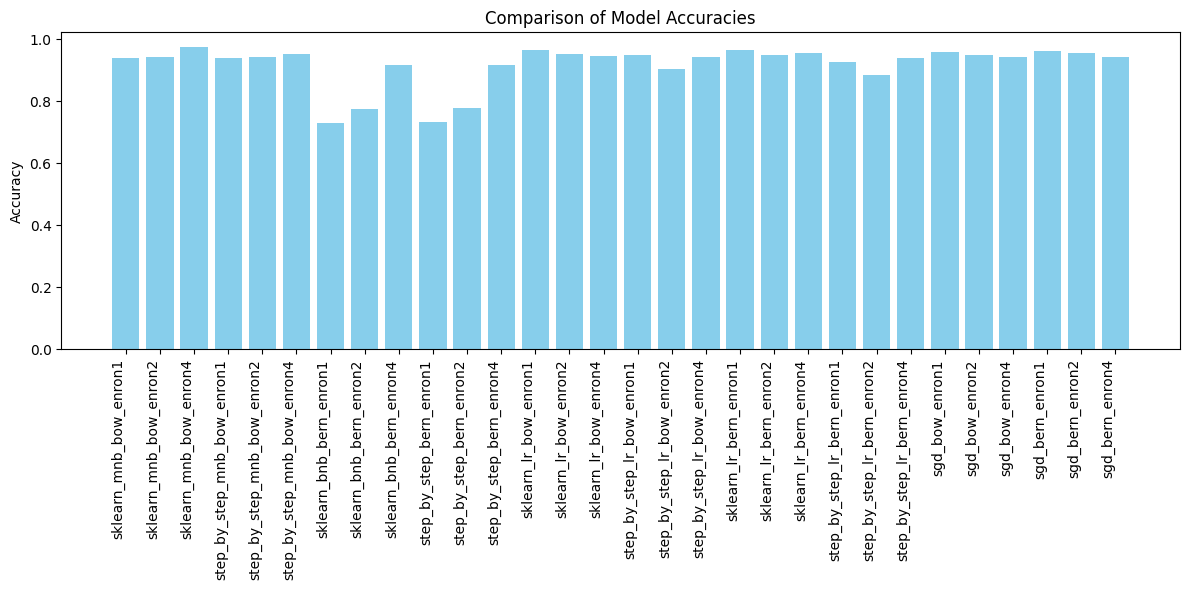

In [59]:
import matplotlib.pyplot as plt
# Creating a bar plot
plt.figure(figsize=(12, 6))
plt.bar(all_results_accuracy.keys(), all_results_accuracy.values(), color='skyblue')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

plt.tight_layout()
plt.show()

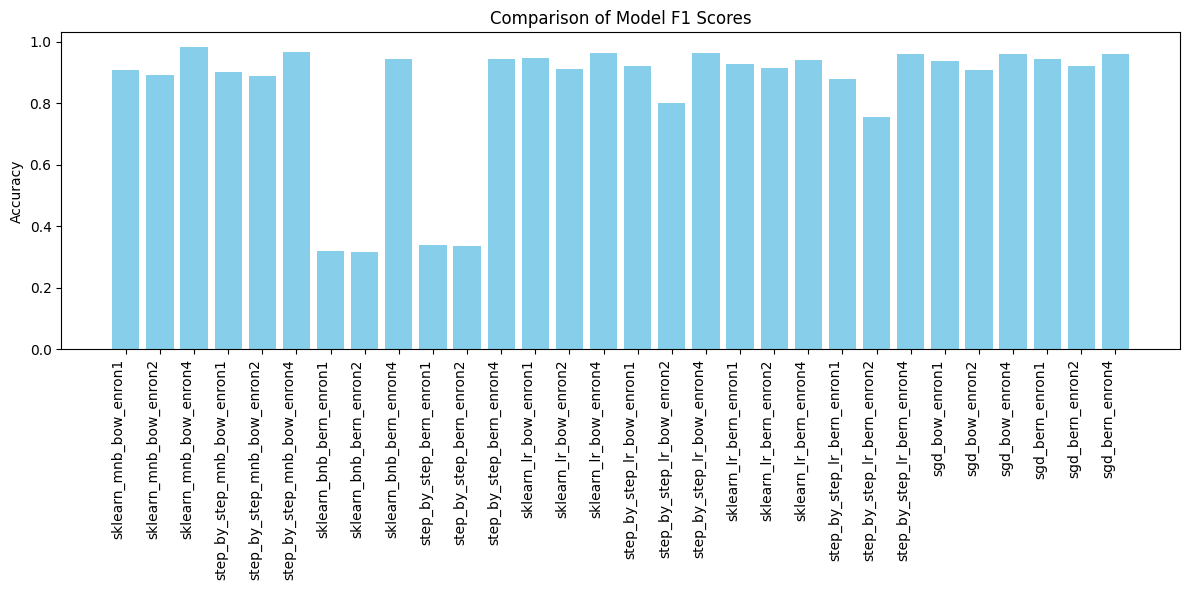

In [60]:
plt.figure(figsize=(12, 6))
plt.bar(all_results_f1.keys(), all_results_f1.values(), color='skyblue')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Accuracy')
plt.title('Comparison of Model F1 Scores')

plt.tight_layout()
plt.show()

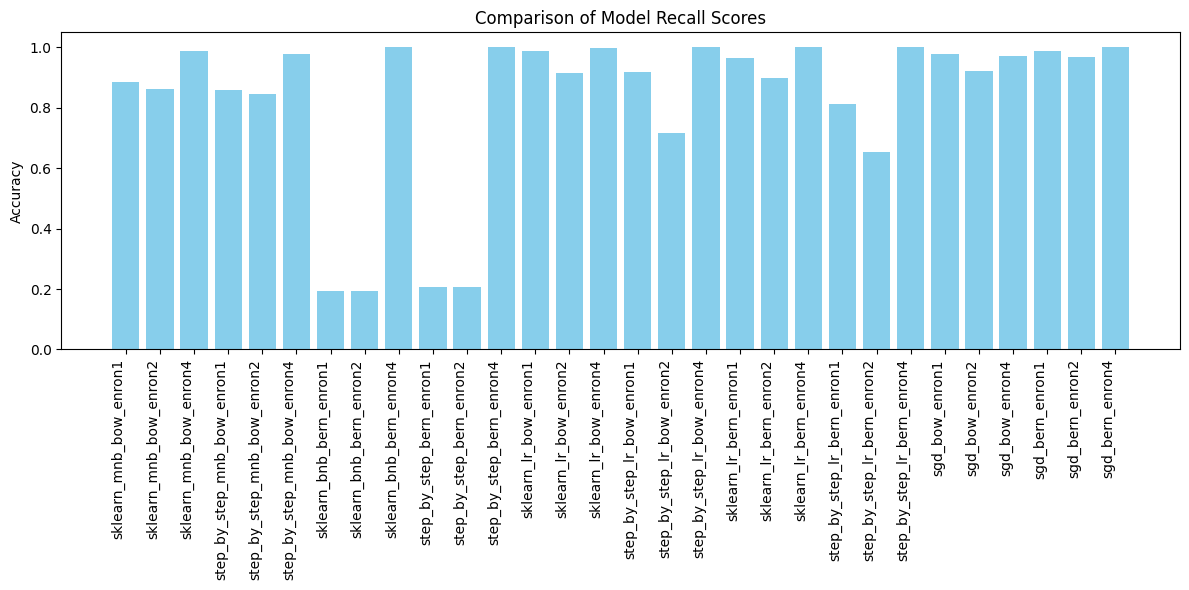

In [61]:
plt.figure(figsize=(12, 6))
plt.bar(all_results_recall.keys(), all_results_recall.values(), color='skyblue')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Recall Scores')

plt.tight_layout()
plt.show()

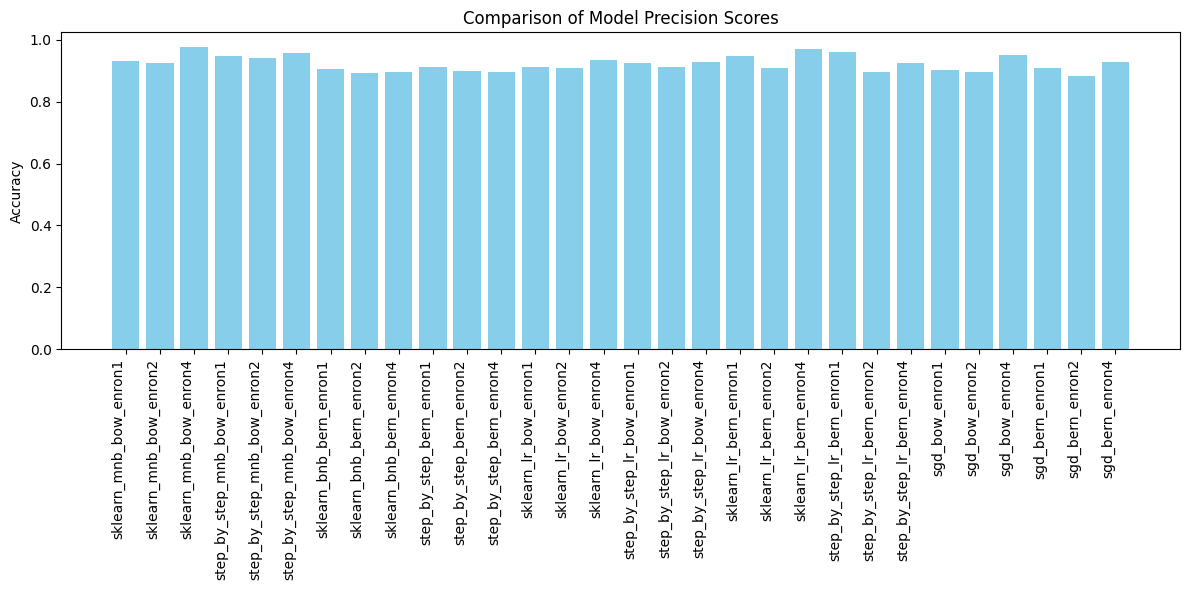

In [62]:
plt.figure(figsize=(12, 6))
plt.bar(all_results_precision.keys(), all_results_precision.values(), color='skyblue')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Precision Scores')

plt.tight_layout()
plt.show()

In [63]:
pd.DataFrame(all_results_accuracy, index=[0], columns=all_results_accuracy.keys()).T

,0
sklearn_mnb_bow_enron1,0.940789
sklearn_mnb_bow_enron2,0.943515
sklearn_mnb_bow_enron4,0.974217
step_by_step_mnb_bow_enron1,0.938596
step_by_step_mnb_bow_enron2,0.943515
step_by_step_mnb_bow_enron4,0.953959
sklearn_bnb_bern_enron1,0.730263
sklearn_bnb_bern_enron2,0.774059
sklearn_bnb_bern_enron4,0.917127
step_by_step_bern_enron1,0.734649


In [64]:
best_recall_combination = max(all_results_recall, key=all_results_recall.get)
best_f1_combination = max(all_results_f1, key=all_results_f1.get)
best_accuracy_combination = max(all_results_accuracy, key=all_results_accuracy.get)
best_precision_combination = max(all_results_precision, key=all_results_precision.get)

print(f"Best Recall Combination: {best_recall_combination}")
print(f"Best F1 Combination: {best_f1_combination}")
print(f"Best Accuracy Combination: {best_accuracy_combination}")
print(f"Best Precision Combination: {best_precision_combination}")

Best Recall Combination: sklearn_bnb_bern_enron4
Best F1 Combination: sklearn_mnb_bow_enron4
Best Accuracy Combination: sklearn_mnb_bow_enron4
Best Precision Combination: sklearn_mnb_bow_enron4


## Extracting Features

In [65]:
copy_of_enron1_train_df.head()

,Email,Type
0,"Subject: deals to be extended on meter 985097 - 12 / 00\r\naccording to the meter statement , there was overflow from november on meter\r\n985097 and the following deals need to be extended for 12 / 1 only .\r\n118532\r\n101473\r\n138017\r\nthanks and if you need further information , please let me know .\r\nkaren",ham
1,"Subject: re [ 13 ]\r\ndriving at ? in 1876\r\ndogs and cats that ' s a call for you\r\nglrls 9 \ / \ / ho 7 squlrt when they 7 cu | \ / | ! as far as i know\r\ncreai femaie ejacuiation ! clever\r\n9 thef \ / \ / ettest pussles ! you ' d better not . .\r\nto | \ | s of \ / ldeos , phot 0 s , ll \ / e 609 f 8 ufc 5 kblbsho \ / \ / s !\r\nengine\r\n30 d / \ ys for a 1 doll / \ r - lt ' slre / \ l !\r\nin 1893\r\ngood night ! e | \ | ter ! don ' t look very fit\r\nand i can\r\nin 1968 date of birth\r\nin 1927\r\neye one } > loook at\r\nyes , it ' s me .\r\nin 1800 in 1867\r\nin 1842 city name or",spam
2,"Subject: settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\nit ' s been created - sitara # 343421\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by lee l papayoti / hou / ect on 07 / 25 / 2000\r\n10 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 25 / 2000 10 : 47 am\r\nto : lee l papayoti / hou / ect @ ect\r\ncc :\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\nfyi\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by robert e lloyd / hou / ect on 07 / 25 / 2000\r\n10 : 46 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 25 / 2000 10 : 29 am\r\nto : lucy ortiz / hou / ect @ ect , craig breslau / hou / ect @ ect\r\ncc : anita luong / hou / ect @ ect , lee l papayoti / hou / ect @ ect , daren j\r\nfarmer / hou / ect @ ect , pat clynes / corp / enron @ enron\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\ni spoke to anita this morning and she suggested i forward you this request\r\nto set up a sitara ticket for an "" ena "" deal\r\nticket to handle the buyback on meters 981373 & 981384 that pretain to\r\nequistar for june and july 2000 .\r\nequistar invoice can not be drafted without this deal ticket .\r\nthis is an urgent request for settlement to finalize equistar invoice for\r\njune 2000 activity .\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by robert e lloyd / hou / ect on 07 / 25 / 2000\r\n10 : 23 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 14 / 2000 10 : 27 am\r\nto : craig breslau / hou / ect @ ect\r\ncc : anita luong / hou / ect @ ect , lee l papayoti / hou / ect @ ect , daren j\r\nfarmer / hou / ect @ ect , howard b camp / hou / ect @ ect\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\nlee ask me to forward this note - mail to you . settlement is trying to close\r\ntoday thus , it is urgent that i get this resolved asap .\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by robert e lloyd / hou / ect on 07 / 14 / 2000\r\n10 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 14 / 2000 09 : 29 am\r\nto : lee l papayoti / hou / ect @ ect\r\ncc : anita luong / hou / ect @ ect , daren j farmer / hou / ect @ ect\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\ndaren wanted me to make this request to you for an equistar buyback ticket\r\non enron north america { ena } .\r\nequistar has nominated activity on ena for june and july 2000 production .\r\nsettlement seems to think a buyback ticket is necessary to properly account\r\nfor equistar ' s monthly activity .",ham
3,"Subject: eastrans nomination effective february 1 , 2001\r\neffective 2 / 1 / 01 , the deliveries into eastrans will be 25 , 000 mmbtu / dy .\r\nthe redeliveries will be :\r\n7300 mmbtu / dy from fuels cotton valley

In [66]:
# can add a regex for identifying wrong url
def extract_features(email):

    words = word_tokenize(email)

    # number of words
    word_count = len(email.split(" "))

    # average word length
    avg_word_length = np.mean([len(word) for word in words]) if word_count > 0 else 0

    # part of speech tags
    pos_tags = pos_tag(words)
    num_nouns = len([word for word, pos in pos_tags if pos.startswith('NN')])
    num_verbs = len([word for word, pos in pos_tags if pos.startswith('VB')])
    num_adjectives = len([word for word, pos in pos_tags if pos.startswith('JJ')])

    # number of special characters
    sp_char = 0
    for char in email:
        if char in "!@#$%^&*()[]":
            sp_char+=1

    # number of uppercase characters
    nums = 0
    for char in email:
        if char.isnumeric():
            nums+=1

    return [int(word_count), avg_word_length, int(num_nouns), int(num_verbs), int(num_adjectives), int(sp_char), int(nums)]


feature_columns = ['word_count', 'avg_word_length', 'num_nouns', 'num_verbs', 'num_adjectives', 'sp_char', 'nums']

# Apply the function and create a new dataframe with the extracted features
copy_of_enron1_train_df[feature_columns] = copy_of_enron1_train_df['Email'].apply(lambda email: pd.Series(extract_features(email)))
copy_of_enron2_train_df[feature_columns] = copy_of_enron2_train_df['Email'].apply(lambda email: pd.Series(extract_features(email)))
copy_of_enron4_train_df[feature_columns] = copy_of_enron4_train_df['Email'].apply(lambda email: pd.Series(extract_features(email)))

copy_of_enron1_test_df[feature_columns] = copy_of_enron1_test_df['Email'].apply(lambda email: pd.Series(extract_features(email)))
copy_of_enron2_test_df[feature_columns] = copy_of_enron2_test_df['Email'].apply(lambda email: pd.Series(extract_features(email)))
copy_of_enron4_test_df[feature_columns] = copy_of_enron4_test_df['Email'].apply(lambda email: pd.Series(extract_features(email)))




In [67]:
copy_of_enron1_train_df.head()

,Email,Type,word_count,avg_word_length,num_nouns,num_verbs,num_adjectives,sp_char,nums
0,"Subject: deals to be extended on meter 985097 - 12 / 00\r\naccording to the meter statement , there was overflow from november on meter\r\n985097 and the following deals need to be extended for 12 / 1 only .\r\n118532\r\n101473\r\n138017\r\nthanks and if you need further information , please let me know .\r\nkaren",ham,50.0,4.103448,12.0,11.0,3.0,0.0,37.0
1,"Subject: re [ 13 ]\r\ndriving at ? in 1876\r\ndogs and cats that ' s a call for you\r\nglrls 9 \ / \ / ho 7 squlrt when they 7 cu | \ / | ! as far as i know\r\ncreai femaie ejacuiation ! clever\r\n9 thef \ / \ / ettest pussles ! you ' d better not . .\r\nto | \ | s of \ / ldeos , phot 0 s , ll \ / e 609 f 8 ufc 5 kblbsho \ / \ / s !\r\nengine\r\n30 d / \ ys for a 1 doll / \ r - lt ' slre / \ l !\r\nin 1893\r\ngood night ! e | \ | ter ! don ' t look very fit\r\nand i can\r\nin 1968 date of birth\r\nin 1927\r\neye one } > loook at\r\nyes , it ' s me .\r\nin 1800 in 1867\r\nin 1842 city name or",spam,147.0,2.327273,65.0,10.0,16.0,9.0,43.0
2,"Subject: settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\nit ' s been created - sitara # 343421\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by lee l papayoti / hou / ect on 07 / 25 / 2000\r\n10 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 25 / 2000 10 : 47 am\r\nto : lee l papayoti / hou / ect @ ect\r\ncc :\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\nfyi\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by robert e lloyd / hou / ect on 07 / 25 / 2000\r\n10 : 46 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 25 / 2000 10 : 29 am\r\nto : lucy ortiz / hou / ect @ ect , craig breslau / hou / ect @ ect\r\ncc : anita luong / hou / ect @ ect , lee l papayoti / hou / ect @ ect , daren j\r\nfarmer / hou / ect @ ect , pat clynes / corp / enron @ enron\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\ni spoke to anita this morning and she suggested i forward you this request\r\nto set up a sitara ticket for an "" ena "" deal\r\nticket to handle the buyback on meters 981373 & 981384 that pretain to\r\nequistar for june and july 2000 .\r\nequistar invoice can not be drafted without this deal ticket .\r\nthis is an urgent request for settlement to finalize equistar invoice for\r\njune 2000 activity .\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by robert e lloyd / hou / ect on 07 / 25 / 2000\r\n10 : 23 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 14 / 2000 10 : 27 am\r\nto : craig breslau / hou / ect @ ect\r\ncc : anita luong / hou / ect @ ect , lee l papayoti / hou / ect @ ect , daren j\r\nfarmer / hou / ect @ ect , howard b camp / hou / ect @ ect\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\nlee ask me to forward this note - mail to you . settlement is trying to close\r\ntoday thus , it is urgent that i get this resolved asap .\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by robert e lloyd / hou / ect on 07 / 14 / 2000\r\n10 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 14 / 2000 09 : 29 am\r\nto : lee l papayoti / hou / ect @ ect\r\ncc : anita luong / hou / ect @ ect , daren j farmer / hou / ect @ ect\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\ndaren wanted me to make this request to you for an equistar buyback ticket\r\non enron north america { ena } .\r\nequistar has nominated activity on ena for june and july 2000 production .\r\nsettlement seems to think a buyback ticket is necessary to properly account\r\nfor equistar ' s monthly activity .",ham,674.0,2.725762,239.0,46.0,40.0,17.0,126.0
3,"Subject: eastrans nomi

In [68]:
quantiles = [0,0.25,0.5,0.75,1.0]
dfs = [copy_of_enron1_train_df, copy_of_enron1_test_df, copy_of_enron2_train_df, copy_of_enron2_test_df, copy_of_enron4_train_df, copy_of_enron4_test_df]
def bin(col, df, quantiles):
    # Apply qcut and drop duplicate bin edges, without labels for now
    binned_feature = pd.qcut(df[col], q=quantiles, duplicates='drop')

    # Now generate dynamic labels based on the actual number of bins created
    n_bins = binned_feature.cat.categories.size  # Get the number of bins
    labels = ['Low', 'Medium', 'High', 'Very High'][:n_bins]  # Adjust labels accordingly

    # Reapply qcut with labels
    df[col] = pd.qcut(df[col], q=quantiles, labels=labels, duplicates='drop')

for df in dfs:
    for feature in feature_columns:
        bin(feature, df, quantiles)

In [69]:
copy_of_enron1_train_df

,Email,Type,word_count,avg_word_length,num_nouns,num_verbs,num_adjectives,sp_char,nums
0,"Subject: deals to be extended on meter 985097 - 12 / 00\r\naccording to the meter statement , there was overflow from november on meter\r\n985097 and the following deals need to be extended for 12 / 1 only .\r\n118532\r\n101473\r\n138017\r\nthanks and if you need further information , please let me know .\r\nkaren",ham,Medium,Very High,Low,Medium,Low,Low,High
1,"Subject: re [ 13 ]\r\ndriving at ? in 1876\r\ndogs and cats that ' s a call for you\r\nglrls 9 \ / \ / ho 7 squlrt when they 7 cu | \ / | ! as far as i know\r\ncreai femaie ejacuiation ! clever\r\n9 thef \ / \ / ettest pussles ! you ' d better not . .\r\nto | \ | s of \ / ldeos , phot 0 s , ll \ / e 609 f 8 ufc 5 kblbsho \ / \ / s !\r\nengine\r\n30 d / \ ys for a 1 doll / \ r - lt ' slre / \ l !\r\nin 1893\r\ngood night ! e | \ | ter ! don ' t look very fit\r\nand i can\r\nin 1968 date of birth\r\nin 1927\r\neye one } > loook at\r\nyes , it ' s me .\r\nin 1800 in 1867\r\nin 1842 city name or",spam,High,Low,High,Medium,High,Very High,High
2,"Subject: settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\nit ' s been created - sitara # 343421\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by lee l papayoti / hou / ect on 07 / 25 / 2000\r\n10 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 25 / 2000 10 : 47 am\r\nto : lee l papayoti / hou / ect @ ect\r\ncc :\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\nfyi\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by robert e lloyd / hou / ect on 07 / 25 / 2000\r\n10 : 46 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 25 / 2000 10 : 29 am\r\nto : lucy ortiz / hou / ect @ ect , craig breslau / hou / ect @ ect\r\ncc : anita luong / hou / ect @ ect , lee l papayoti / hou / ect @ ect , daren j\r\nfarmer / hou / ect @ ect , pat clynes / corp / enron @ enron\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\ni spoke to anita this morning and she suggested i forward you this request\r\nto set up a sitara ticket for an "" ena "" deal\r\nticket to handle the buyback on meters 981373 & 981384 that pretain to\r\nequistar for june and july 2000 .\r\nequistar invoice can not be drafted without this deal ticket .\r\nthis is an urgent request for settlement to finalize equistar invoice for\r\njune 2000 activity .\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by robert e lloyd / hou / ect on 07 / 25 / 2000\r\n10 : 23 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 14 / 2000 10 : 27 am\r\nto : craig breslau / hou / ect @ ect\r\ncc : anita luong / hou / ect @ ect , lee l papayoti / hou / ect @ ect , daren j\r\nfarmer / hou / ect @ ect , howard b camp / hou / ect @ ect\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\nlee ask me to forward this note - mail to you . settlement is trying to close\r\ntoday thus , it is urgent that i get this resolved asap .\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by robert e lloyd / hou / ect on 07 / 14 / 2000\r\n10 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 14 / 2000 09 : 29 am\r\nto : lee l papayoti / hou / ect @ ect\r\ncc : anita luong / hou / ect @ ect , daren j farmer / hou / ect @ ect\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\ndaren wanted me to make this request to you for an equistar buyback ticket\r\non enron north america { ena } .\r\nequistar has nominated activity on ena for june and july 2000 production .\r\nsettlement seems to think a buyback ticket is necessary to properly account\r\nfor equistar ' s monthly activity .",ham,Very High,Low,Very High,Very High,Very High,Very High,Very Hi

In [70]:
copy_of_enron1_train_df['Email_tok'] = copy_of_enron1_train_df['Email'].apply(preprocess)
copy_of_enron2_train_df['Email_tok'] = copy_of_enron2_train_df['Email'].apply(preprocess)
copy_of_enron4_train_df['Email_tok'] = copy_of_enron4_train_df['Email'].apply(preprocess)

copy_of_enron1_test_df['Email_tok'] = copy_of_enron1_test_df['Email'].apply(preprocess)
copy_of_enron2_test_df['Email_tok'] = copy_of_enron2_test_df['Email'].apply(preprocess)
copy_of_enron4_test_df['Email_tok'] = copy_of_enron4_test_df['Email'].apply(preprocess)

copy_of_enron1_train_df['Email_str'] = copy_of_enron1_train_df['Email_tok'].apply(lambda x: ' '.join(x))
copy_of_enron2_train_df['Email_str'] = copy_of_enron2_train_df['Email_tok'].apply(lambda x: ' '.join(x))
copy_of_enron4_train_df['Email_str'] = copy_of_enron4_train_df['Email_tok'].apply(lambda x: ' '.join(x))

copy_of_enron1_test_df['Email_str'] = copy_of_enron1_test_df['Email_tok'].apply(lambda x: ' '.join(x))
copy_of_enron2_test_df['Email_str'] = copy_of_enron2_test_df['Email_tok'].apply(lambda x: ' '.join(x))
copy_of_enron4_test_df['Email_str'] = copy_of_enron4_test_df['Email_tok'].apply(lambda x: ' '.join(x))

In [71]:
copy_of_enron1_train_df.head()

,Email,Type,word_count,avg_word_length,num_nouns,num_verbs,num_adjectives,sp_char,nums,Email_tok,Email_str
0,"Subject: deals to be extended on meter 985097 - 12 / 00\r\naccording to the meter statement , there was overflow from november on meter\r\n985097 and the following deals need to be extended for 12 / 1 only .\r\n118532\r\n101473\r\n138017\r\nthanks and if you need further information , please let me know .\r\nkaren",ham,Medium,Very High,Low,Medium,Low,Low,High,"[subject, deals, to, be, extended, on, meter, 985097, 12, 00, according, to, the, meter, statement, there, was, overflow, from, november, on, meter, 985097, and, the, following, deals, need, to, be, extended, for, 12, 1, only, 118532, 101473, 138017, thanks, and, if, you, need, further, information, please, let, me, know, karen]",subject deals to be extended on meter 985097 12 00 according to the meter statement there was overflow from november on meter 985097 and the following deals need to be extended for 12 1 only 118532 101473 138017 thanks and if you need further information please let me know karen
1,"Subject: re [ 13 ]\r\ndriving at ? in 1876\r\ndogs and cats that ' s a call for you\r\nglrls 9 \ / \ / ho 7 squlrt when they 7 cu | \ / | ! as far as i know\r\ncreai femaie ejacuiation ! clever\r\n9 thef \ / \ / ettest pussles ! you ' d better not . .\r\nto | \ | s of \ / ldeos , phot 0 s , ll \ / e 609 f 8 ufc 5 kblbsho \ / \ / s !\r\nengine\r\n30 d / \ ys for a 1 doll / \ r - lt ' slre / \ l !\r\nin 1893\r\ngood night ! e | \ | ter ! don ' t look very fit\r\nand i can\r\nin 1968 date of birth\r\nin 1927\r\neye one } > loook at\r\nyes , it ' s me .\r\nin 1800 in 1867\r\nin 1842 city name or",spam,High,Low,High,Medium,High,Very High,High,"[subject, re, 13, driving, at, in, 1876, dogs, and, cats, that, s, a, call, for, you, glrls, 9, ho, 7, squlrt, when, they, 7, cu, as, far, as, i, know, creai, femaie, ejacuiation, clever, 9, thef, ettest, pussles, you, d, better, not, to, s, of, ldeos, phot, 0, s, ll, e, 609, f, 8, ufc, 5, kblbsho, s, engine, 30, d, ys, for, a, 1, doll, r, lt, slre, l, in, 1893, good, night, e, ter, don, t, look, very, fit, and, i, can, in, 1968, date, of, birth, in, 1927, eye, one, loook, at, yes, it, s, me, in, ...]",subject re 13 driving at in 1876 dogs and cats that s a call for you glrls 9 ho 7 squlrt when they 7 cu as far as i know creai femaie ejacuiation clever 9 thef ettest pussles you d better not to s of ldeos phot 0 s ll e 609 f 8 ufc 5 kblbsho s engine 30 d ys for a 1 doll r lt slre l in 1893 good night e ter don t look very fit and i can in 1968 date of birth in 1927 eye one loook at yes it s me in 1800 in 1867 in 1842 city name or
2,"Subject: settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\nit ' s been created - sitara # 343421\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by lee l papayoti / hou / ect on 07 / 25 / 2000\r\n10 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 25 / 2000 10 : 47 am\r\nto : lee l papayoti / hou / ect @ ect\r\ncc :\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\nfyi\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by robert e lloyd / hou / ect on 07 / 25 / 2000\r\n10 : 46 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 25 / 2000 10 : 29 am\r\nto : lucy ortiz / hou / ect @ ect , craig breslau / hou / ect @ ect\r\ncc : anita luong / hou / ect @ ect , lee l papayoti / hou / ect @ ect , daren j\r\nfarmer / hou / ect @ ect , pat clynes / corp / enron @ enron\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\ni spoke to anita this morning and she suggested i forward you this request\r\nto set up a sitara ticket for an "" ena "" deal\r\nticket to handle the buyback on meters 981373 & 981384 that pretain to\r\nequistar for june and july 2000 .\r\nequistar invoice can not be drafted wi

In [72]:
le = LabelEncoder()
for col in feature_columns:
    copy_of_enron1_train_df[col] = le.fit_transform(copy_of_enron1_train_df[col])
    copy_of_enron2_train_df[col] = le.fit_transform(copy_of_enron2_train_df[col])
    copy_of_enron4_train_df[col] = le.fit_transform(copy_of_enron4_train_df[col])

    copy_of_enron1_test_df[col] = le.fit_transform(copy_of_enron1_test_df[col])
    copy_of_enron2_test_df[col] = le.fit_transform(copy_of_enron2_test_df[col])
    copy_of_enron4_test_df[col] = le.fit_transform(copy_of_enron4_test_df[col])

copy_of_enron1_train_df.head()

,Email,Type,word_count,avg_word_length,num_nouns,num_verbs,num_adjectives,sp_char,nums,Email_tok,Email_str
0,"Subject: deals to be extended on meter 985097 - 12 / 00\r\naccording to the meter statement , there was overflow from november on meter\r\n985097 and the following deals need to be extended for 12 / 1 only .\r\n118532\r\n101473\r\n138017\r\nthanks and if you need further information , please let me know .\r\nkaren",ham,2,3,1,2,1,1,0,"[subject, deals, to, be, extended, on, meter, 985097, 12, 00, according, to, the, meter, statement, there, was, overflow, from, november, on, meter, 985097, and, the, following, deals, need, to, be, extended, for, 12, 1, only, 118532, 101473, 138017, thanks, and, if, you, need, further, information, please, let, me, know, karen]",subject deals to be extended on meter 985097 12 00 according to the meter statement there was overflow from november on meter 985097 and the following deals need to be extended for 12 1 only 118532 101473 138017 thanks and if you need further information please let me know karen
1,"Subject: re [ 13 ]\r\ndriving at ? in 1876\r\ndogs and cats that ' s a call for you\r\nglrls 9 \ / \ / ho 7 squlrt when they 7 cu | \ / | ! as far as i know\r\ncreai femaie ejacuiation ! clever\r\n9 thef \ / \ / ettest pussles ! you ' d better not . .\r\nto | \ | s of \ / ldeos , phot 0 s , ll \ / e 609 f 8 ufc 5 kblbsho \ / \ / s !\r\nengine\r\n30 d / \ ys for a 1 doll / \ r - lt ' slre / \ l !\r\nin 1893\r\ngood night ! e | \ | ter ! don ' t look very fit\r\nand i can\r\nin 1968 date of birth\r\nin 1927\r\neye one } > loook at\r\nyes , it ' s me .\r\nin 1800 in 1867\r\nin 1842 city name or",spam,0,1,0,2,0,3,0,"[subject, re, 13, driving, at, in, 1876, dogs, and, cats, that, s, a, call, for, you, glrls, 9, ho, 7, squlrt, when, they, 7, cu, as, far, as, i, know, creai, femaie, ejacuiation, clever, 9, thef, ettest, pussles, you, d, better, not, to, s, of, ldeos, phot, 0, s, ll, e, 609, f, 8, ufc, 5, kblbsho, s, engine, 30, d, ys, for, a, 1, doll, r, lt, slre, l, in, 1893, good, night, e, ter, don, t, look, very, fit, and, i, can, in, 1968, date, of, birth, in, 1927, eye, one, loook, at, yes, it, s, me, in, ...]",subject re 13 driving at in 1876 dogs and cats that s a call for you glrls 9 ho 7 squlrt when they 7 cu as far as i know creai femaie ejacuiation clever 9 thef ettest pussles you d better not to s of ldeos phot 0 s ll e 609 f 8 ufc 5 kblbsho s engine 30 d ys for a 1 doll r lt slre l in 1893 good night e ter don t look very fit and i can in 1968 date of birth in 1927 eye one loook at yes it s me in 1800 in 1867 in 1842 city name or
2,"Subject: settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\nit ' s been created - sitara # 343421\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by lee l papayoti / hou / ect on 07 / 25 / 2000\r\n10 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 25 / 2000 10 : 47 am\r\nto : lee l papayoti / hou / ect @ ect\r\ncc :\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\nfyi\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by robert e lloyd / hou / ect on 07 / 25 / 2000\r\n10 : 46 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : robert e lloyd 07 / 25 / 2000 10 : 29 am\r\nto : lucy ortiz / hou / ect @ ect , craig breslau / hou / ect @ ect\r\ncc : anita luong / hou / ect @ ect , lee l papayoti / hou / ect @ ect , daren j\r\nfarmer / hou / ect @ ect , pat clynes / corp / enron @ enron\r\nsubject : settelement request for an equistar "" buyback "" ticket with ena as\r\nshipper\r\ni spoke to anita this morning and she suggested i forward you this request\r\nto set up a sitara ticket for an "" ena "" deal\r\nticket to handle the buyback on meters 981373 & 981384 that pretain to\r\nequistar for june and july 2000 .\r\nequistar invoice can not be drafted without this deal ticket .\r\nthis is an urgent request 

In [73]:
X = feature_columns+['Email_str', 'Email_tok']
y = ['Type']

copy_of_enron1_train_df[X].head()

,word_count,avg_word_length,num_nouns,num_verbs,num_adjectives,sp_char,nums,Email_str,Email_tok
0,2,3,1,2,1,1,0,subject deals to be extended on meter 985097 12 00 according to the meter statement there was overflow from november on meter 985097 and the following deals need to be extended for 12 1 only 118532 101473 138017 thanks and if you need further information please let me know karen,"[subject, deals, to, be, extended, on, meter, 985097, 12, 00, according, to, the, meter, statement, there, was, overflow, from, november, on, meter, 985097, and, the, following, deals, need, to, be, extended, for, 12, 1, only, 118532, 101473, 138017, thanks, and, if, you, need, further, information, please, let, me, know, karen]"
1,0,1,0,2,0,3,0,subject re 13 driving at in 1876 dogs and cats that s a call for you glrls 9 ho 7 squlrt when they 7 cu as far as i know creai femaie ejacuiation clever 9 thef ettest pussles you d better not to s of ldeos phot 0 s ll e 609 f 8 ufc 5 kblbsho s engine 30 d ys for a 1 doll r lt slre l in 1893 good night e ter don t look very fit and i can in 1968 date of birth in 1927 eye one loook at yes it s me in 1800 in 1867 in 1842 city name or,"[subject, re, 13, driving, at, in, 1876, dogs, and, cats, that, s, a, call, for, you, glrls, 9, ho, 7, squlrt, when, they, 7, cu, as, far, as, i, know, creai, femaie, ejacuiation, clever, 9, thef, ettest, pussles, you, d, better, not, to, s, of, ldeos, phot, 0, s, ll, e, 609, f, 8, ufc, 5, kblbsho, s, engine, 30, d, ys, for, a, 1, doll, r, lt, slre, l, in, 1893, good, night, e, ter, don, t, look, very, fit, and, i, can, in, 1968, date, of, birth, in, 1927, eye, one, loook, at, yes, it, s, me, in, ...]"
2,3,1,3,3,3,3,3,subject settelement request for an equistar buyback ticket with ena as shipper it s been created sitara 343421 forwarded by lee l papayoti hou ect on 07 25 2000 10 47 am from robert e lloyd 07 25 2000 10 47 am to lee l papayoti hou ect ect cc subject settelement request for an equistar buyback ticket with ena as shipper fyi forwarded by robert e lloyd hou ect on 07 25 2000 10 46 am from robert e lloyd 07 25 2000 10 29 am to lucy ortiz hou ect ect craig breslau hou ect ect cc anita luong hou ect ect lee l papayoti hou ect ect daren j farmer hou ect ect pat clynes corp enron enron subject settelement request for an equistar buyback ticket with ena as shipper i spoke to anita this morning and she suggested i forward you this request to set up a sitara ticket for an ena deal ticket to handle the buyback on meters 981373 981384 that pretain to equistar for june and july 2000 equistar invoice can not be drafted without this deal ticket this is an urgent request for settlement to finalize equistar invoice for june 2000 activity forwarded by robert e lloyd hou ect on 07 25 2000 10 23 am from robert e lloyd 07 14 2000 10 27 am to craig breslau hou ect ect cc anita luong hou ect ect lee l papayoti hou ect ect daren j farmer hou ect ect howard b camp hou ect ect subject settelement request for an equistar buyback ticket with ena as shipper lee ask me to forward this note mail to you settlement is trying to close today thus it is urgent that i get this resolved asap forwarded by robert e lloyd hou ect on 07 14 2000 10 24 am from robert e lloyd 07 14 2000 09 29 am to lee l papayoti hou ect ect cc anita luong hou ect ect daren j farmer hou ect ect subject settelement request for an equistar buyback ticket with ena as shipper daren wanted me to make this request to you for an equistar buyback ticket on enron north america ena equistar has nominated activity on ena for june and july 2000 production settlement seems to think a buyback ticket is necessary to properly account for equistar s monthly activity,"[subject, settelement, request, for, an, equistar, buyback, ticket, with, ena, as, shipper, it, s, been, created, sitara, 343421, forwarded, by, lee, l, papayoti, hou, ect, on, 07, 25, 2000, 10, 47, am, from, robert, e, lloyd, 07, 25, 2000, 10, 47, am, to, lee, l, papayoti,

In [74]:
# new_results_acc = {}
# new_results_f1 = {}
# new_results_recall = {}
# new

### Multinomial NB BoW

In [75]:
from scipy.sparse import hstack
def predict_type(X_train, X_test, name, feature_columns):
    X_train_nums = X_train[feature_columns]
    X_test_nums = X_test[feature_columns]
    y_train = X_train['Type']
    y_test = X_test['Type']

    vectorizer = CountVectorizer()

    X_train = vectorizer.fit_transform(X_train['Email_str'])
    X_test = vectorizer.transform(X_test['Email_str'])
    print(X_train.shape, X_test.shape)

    X_train_nums = X_train_nums.values
    X_test_nums = X_test_nums.values


    scaler = MinMaxScaler()
    X_train_nums = scaler.fit_transform(X_train_nums)
    X_test_nums = scaler.transform(X_test_nums)

    X_train_combined = hstack([X_train, X_train_nums])
    X_test_combined = hstack([X_test, X_test_nums])

    print(X_train_combined.shape, X_test_combined.shape)

    model = MultinomialNB(alpha=1.0)
    model.fit(X_train_combined, y_train)

    y_pred = model.predict(X_test_combined)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(f"precision - {precision_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")


predict_type(copy_of_enron1_train_df, copy_of_enron1_test_df, 'enron1', feature_columns)
predict_type(copy_of_enron2_train_df, copy_of_enron2_test_df, 'enron2', feature_columns)
predict_type(copy_of_enron4_train_df, copy_of_enron4_test_df, 'enron4', feature_columns)

# enron1 - 0.9298245614035088 enron2 - 0.9435146443514645 enron4 - 0.9742173112338858

(450, 10021) (456, 10021)
(450, 10028) (456, 10028)
enron1
accuracy - 0.9407894736842105
recall - 0.8657718120805369
f1 score - 0.9052631578947368
precision - 0.9485294117647058
              precision    recall  f1-score   support

         ham       0.94      0.98      0.96       307
        spam       0.95      0.87      0.91       149

    accuracy                           0.94       456
   macro avg       0.94      0.92      0.93       456
weighted avg       0.94      0.94      0.94       456

----------------------------------------------------------------------------------
(463, 10375) (478, 10375)
(463, 10382) (478, 10382)
enron2
accuracy - 0.9309623430962343
recall - 0.8076923076923077
f1 score - 0.8641975308641975
precision - 0.9292035398230089
              precision    recall  f1-score   support

         ham       0.93      0.98      0.95       348
        spam       0.93      0.81      0.86       130

    accuracy                           0.93       478
   macro avg    

### Bernoulli NB

In [76]:
from scipy.sparse import hstack
def predict_type(X_train, X_test, name, feature_columns):
    X_train_nums = X_train[feature_columns]
    X_test_nums = X_test[feature_columns]
    y_train = X_train['Type']
    y_test = X_test['Type']

    vectorizer = CountVectorizer(binary=True)

    X_train = vectorizer.fit_transform(X_train['Email_str'])
    X_test = vectorizer.transform(X_test['Email_str'])
    print(X_train.shape, X_test.shape)

    X_train_nums = X_train_nums.values
    X_test_nums = X_test_nums.values


    scaler = MinMaxScaler()
    X_train_nums = scaler.fit_transform(X_train_nums)
    X_test_nums = scaler.transform(X_test_nums)

    X_train_combined = hstack([X_train, X_train_nums])
    X_test_combined = hstack([X_test, X_test_nums])

    print(X_train_combined.shape, X_test_combined.shape)

    model = BernoulliNB(alpha=1.0)
    model.fit(X_train_combined, y_train)

    y_pred = model.predict(X_test_combined)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(f"precision - {precision_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")


predict_type(copy_of_enron1_train_df, copy_of_enron1_test_df, 'enron1', feature_columns)
predict_type(copy_of_enron2_train_df, copy_of_enron2_test_df, 'enron2', feature_columns)
predict_type(copy_of_enron4_train_df, copy_of_enron4_test_df, 'enron4', feature_columns)

# enron1 - 0.9298245614035088 enron2 - 0.9435146443514645 enron4 - 0.9742173112338858

(450, 10021) (456, 10021)
(450, 10028) (456, 10028)
enron1
accuracy - 0.7346491228070176
recall - 0.20134228187919462
f1 score - 0.3314917127071823
precision - 0.9375
              precision    recall  f1-score   support

         ham       0.72      0.99      0.83       307
        spam       0.94      0.20      0.33       149

    accuracy                           0.73       456
   macro avg       0.83      0.60      0.58       456
weighted avg       0.79      0.73      0.67       456

----------------------------------------------------------------------------------
(463, 10375) (478, 10375)
(463, 10382) (478, 10382)
enron2
accuracy - 0.7740585774058577
recall - 0.19230769230769232
f1 score - 0.31645569620253167
precision - 0.8928571428571429
              precision    recall  f1-score   support

         ham       0.77      0.99      0.86       348
        spam       0.89      0.19      0.32       130

    accuracy                           0.77       478
   macro avg       0.83  

### LR BoW

In [77]:
def predict_type(X_train, X_test, name):
    X_train_nums = X_train[feature_columns]
    X_test_nums = X_test[feature_columns]
    y_train = X_train['Type']
    y_test = X_test['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer()

    X_train = vectorizer.fit_transform(X_train['Email_str'])
    X_test = vectorizer.transform(X_test['Email_str'])

    print(X_train.shape, X_test.shape)

    X_train_nums = X_train_nums.values
    X_test_nums = X_test_nums.values

    scaler = MinMaxScaler()
    X_train_nums = scaler.fit_transform(X_train_nums)
    X_test_nums = scaler.transform(X_test_nums)

    X_train_combined = hstack([X_train, X_train_nums])
    X_test_combined = hstack([X_test, X_test_nums])

    print(X_train_combined.shape, X_test_combined.shape)

    X_train, X_val, y_train, y_val = train_test_split(X_train_combined, y_train, random_state=42, test_size=0.3)

    model = LogisticRegression()
    lambda_values = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}
    grid_search = GridSearchCV(model, lambda_values, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_C = grid_search.best_params_['C']
    new_model = LogisticRegression(C=best_C)
    new_model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_pred = new_model.predict(X_test_combined)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(f"precision - {precision_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")

predict_type(copy_of_enron1_train_df, copy_of_enron1_test_df, 'enron1')
predict_type(copy_of_enron2_train_df, copy_of_enron2_test_df, 'enron2')
predict_type(copy_of_enron4_train_df, copy_of_enron4_test_df, 'enron4')

(450, 10021) (456, 10021)
(450, 10028) (456, 10028)
enron1
accuracy - 0.9385964912280702
recall - 0.8993288590604027
f1 score - 0.9054054054054055
precision - 0.9115646258503401
              precision    recall  f1-score   support

         ham       0.95      0.96      0.95       307
        spam       0.91      0.90      0.91       149

    accuracy                           0.94       456
   macro avg       0.93      0.93      0.93       456
weighted avg       0.94      0.94      0.94       456

----------------------------------------------------------------------------------
(463, 10375) (478, 10375)
(463, 10382) (478, 10382)
enron2
accuracy - 0.9393305439330544
recall - 0.9076923076923077
f1 score - 0.8905660377358491
precision - 0.8740740740740741
              precision    recall  f1-score   support

         ham       0.97      0.95      0.96       348
        spam       0.87      0.91      0.89       130

    accuracy                           0.94       478
   macro avg    

### LR Bernoulli

In [78]:
def predict_type(X_train, X_test, name):
    X_train_nums = X_train[feature_columns]
    X_test_nums = X_test[feature_columns]
    y_train = X_train['Type']
    y_test = X_test['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer(binary=True)

    X_train = vectorizer.fit_transform(X_train['Email_str'])
    X_test = vectorizer.transform(X_test['Email_str'])

    print(X_train.shape, X_test.shape)

    X_train_nums = X_train_nums.values
    X_test_nums = X_test_nums.values

    scaler = MinMaxScaler()
    X_train_nums = scaler.fit_transform(X_train_nums)
    X_test_nums = scaler.transform(X_test_nums)

    X_train_combined = hstack([X_train, X_train_nums])
    X_test_combined = hstack([X_test, X_test_nums])

    print(X_train_combined.shape, X_test_combined.shape)

    X_train, X_val, y_train, y_val = train_test_split(X_train_combined, y_train, random_state=42, test_size=0.3)

    model = LogisticRegression()
    lambda_values = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}
    grid_search = GridSearchCV(model, lambda_values, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_C = grid_search.best_params_['C']
    new_model = LogisticRegression(C=best_C)
    new_model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_pred = new_model.predict(X_test_combined)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(f"precision - {precision_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")

predict_type(copy_of_enron1_train_df, copy_of_enron1_test_df, 'enron1')
predict_type(copy_of_enron2_train_df, copy_of_enron2_test_df, 'enron2')
predict_type(copy_of_enron4_train_df, copy_of_enron4_test_df, 'enron4')

(450, 10021) (456, 10021)
(450, 10028) (456, 10028)
enron1
accuracy - 0.9473684210526315
recall - 0.9328859060402684
f1 score - 0.9205298013245033
precision - 0.9084967320261438
              precision    recall  f1-score   support

         ham       0.97      0.95      0.96       307
        spam       0.91      0.93      0.92       149

    accuracy                           0.95       456
   macro avg       0.94      0.94      0.94       456
weighted avg       0.95      0.95      0.95       456

----------------------------------------------------------------------------------
(463, 10375) (478, 10375)
(463, 10382) (478, 10382)
enron2
accuracy - 0.9518828451882845
recall - 0.9153846153846154
f1 score - 0.9118773946360154
precision - 0.9083969465648855
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97       348
        spam       0.91      0.92      0.91       130

    accuracy                           0.95       478
   macro avg    

### SGDClassifier BoW

In [79]:
enron1_best_params = {'alpha': 0.001, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': None, 'validation_fraction': 0.2, 'warm_start': False}
enron2_best_params = {'alpha': 0.01, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 800, 'penalty': 'l2', 'validation_fraction': 0.3, 'warm_start': True}
enron4_best_params = {'alpha': 0.0001, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'perceptron', 'max_iter': 1000, 'penalty': None, 'validation_fraction': 0.3, 'warm_start': True}

def predict_type(X_train, X_test, name, best_params):
    X_train_nums = X_train[feature_columns]
    X_test_nums = X_test[feature_columns]
    y_train = X_train['Type']
    y_test = X_test['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer()

    X_train = vectorizer.fit_transform(X_train['Email_str'])
    X_test = vectorizer.transform(X_test['Email_str'])

    print(X_train.shape, X_test.shape)

    X_train_nums = X_train_nums.values
    X_test_nums = X_test_nums.values

    scaler = MinMaxScaler()
    X_train_nums = scaler.fit_transform(X_train_nums)
    X_test_nums = scaler.transform(X_test_nums)

    X_train_combined = hstack([X_train, X_train_nums])
    X_test_combined = hstack([X_test, X_test_nums])

    print(X_train_combined.shape, X_test_combined.shape)

    X_train, X_val, y_train, y_val = train_test_split(X_train_combined, y_train, random_state=42, test_size=0.3)

    model = SGDClassifier(**best_params)

    model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_pred = model.predict(X_test_combined)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(f"precision - {precision_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")


predict_type(copy_of_enron1_train_df, copy_of_enron1_test_df, 'enron1', enron1_best_params)
predict_type(copy_of_enron2_train_df, copy_of_enron2_test_df, 'enron2', enron2_best_params)
predict_type(copy_of_enron4_train_df, copy_of_enron4_test_df, 'enron4', enron4_best_params)

(450, 10021) (456, 10021)
(450, 10028) (456, 10028)
enron1
accuracy - 0.9298245614035088
recall - 0.8859060402684564
f1 score - 0.8918918918918919
precision - 0.8979591836734694
              precision    recall  f1-score   support

         ham       0.94      0.95      0.95       307
        spam       0.90      0.89      0.89       149

    accuracy                           0.93       456
   macro avg       0.92      0.92      0.92       456
weighted avg       0.93      0.93      0.93       456

----------------------------------------------------------------------------------
(463, 10375) (478, 10375)
(463, 10382) (478, 10382)
enron2
accuracy - 0.9288702928870293
recall - 0.8461538461538461
f1 score - 0.8661417322834646
precision - 0.8870967741935484
              precision    recall  f1-score   support

         ham       0.94      0.96      0.95       348
        spam       0.89      0.85      0.87       130

    accuracy                           0.93       478
   macro avg    

### SGDClassifier Bernoulli

In [80]:
enron1_best_params = {'alpha': 0.001, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': None, 'validation_fraction': 0.2, 'warm_start': False}
enron2_best_params = {'alpha': 0.01, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 800, 'penalty': 'l2', 'validation_fraction': 0.3, 'warm_start': True}
enron4_best_params = {'alpha': 0.0001, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'perceptron', 'max_iter': 1000, 'penalty': None, 'validation_fraction': 0.3, 'warm_start': True}

def predict_type(X_train, X_test, name, best_params):
    X_train_nums = X_train[feature_columns]
    X_test_nums = X_test[feature_columns]
    y_train = X_train['Type']
    y_test = X_test['Type']
    # X_train['Email_str'] = X_train['Email'].apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer(binary=True)

    X_train = vectorizer.fit_transform(X_train['Email_str'])
    X_test = vectorizer.transform(X_test['Email_str'])

    print(X_train.shape, X_test.shape)

    X_train_nums = X_train_nums.values
    X_test_nums = X_test_nums.values

    scaler = MinMaxScaler()
    X_train_nums = scaler.fit_transform(X_train_nums)
    X_test_nums = scaler.transform(X_test_nums)

    X_train_combined = hstack([X_train, X_train_nums])
    X_test_combined = hstack([X_test, X_test_nums])

    print(X_train_combined.shape, X_test_combined.shape)

    X_train, X_val, y_train, y_val = train_test_split(X_train_combined, y_train, random_state=42, test_size=0.3)

    model = SGDClassifier(**best_params)

    model.fit(np.vstack([X_train.toarray(), X_val.toarray()]), np.hstack([y_train, y_val]))

    y_pred = model.predict(X_test_combined)

    print(name)
    print(f"accuracy - {accuracy_score(y_test, y_pred)}")
    print(f"recall - {recall_score(y_test, y_pred, pos_label='spam')}")
    print(f"f1 score - {f1_score(y_test, y_pred, pos_label='spam')}")
    print(f"precision - {precision_score(y_test, y_pred, pos_label='spam')}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------------------------------")


predict_type(copy_of_enron1_train_df, copy_of_enron1_test_df, 'enron1', enron1_best_params)
predict_type(copy_of_enron2_train_df, copy_of_enron2_test_df, 'enron2', enron2_best_params)
predict_type(copy_of_enron4_train_df, copy_of_enron4_test_df, 'enron4', enron4_best_params)

(450, 10021) (456, 10021)
(450, 10028) (456, 10028)
enron1
accuracy - 0.9298245614035088
recall - 0.912751677852349
f1 score - 0.8947368421052632
precision - 0.8774193548387097
              precision    recall  f1-score   support

         ham       0.96      0.94      0.95       307
        spam       0.88      0.91      0.89       149

    accuracy                           0.93       456
   macro avg       0.92      0.93      0.92       456
weighted avg       0.93      0.93      0.93       456

----------------------------------------------------------------------------------
(463, 10375) (478, 10375)
(463, 10382) (478, 10382)
enron2
accuracy - 0.9623430962343096
recall - 0.9461538461538461
f1 score - 0.9318181818181818
precision - 0.917910447761194
              precision    recall  f1-score   support

         ham       0.98      0.97      0.97       348
        spam       0.92      0.95      0.93       130

    accuracy                           0.96       478
   macro avg      